In [1]:
# Importing liberaries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tabulate import tabulate
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
%matplotlib inline

In [2]:
# reading dataset
# This data set is collected using web scraping methods from https://bitinfocharts.com till 18th may 2021
df=pd.read_csv("DataSet.csv")
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.set_index("Date", inplace = True)

In [3]:
df.head()

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2612.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2010-07-19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4047.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2010-07-20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
2010-07-21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0
2010-07-22,0.0649,221,491.903,412,181.543,1.705481e+09,334641.0,2570.0,0.000000,0.0,...,49.814,0.0,0.0,0.0,0.0,-24.455,0.0,0.0,0.0,0.0


In [4]:
# checking data set contains null values
df.isnull().values.any()

False

In [5]:
missed = pd.DataFrame()
missed['column'] = df.columns

missed['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]

missed = missed.sort_values('percent',ascending=False)
print(missed)

                        column  percent
0                     priceUSD      0.0
494   transactionvalue30stdUSD      0.0
485   transactionvalue90trxUSD      0.0
486    transactionvalue3momUSD      0.0
487    transactionvalue7momUSD      0.0
..                         ...      ...
247   mining_profitability7ema      0.0
248  mining_profitability14ema      0.0
249  mining_profitability30ema      0.0
250  mining_profitability90ema      0.0
735              price90rocUSD      0.0

[736 rows x 2 columns]


In [6]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
print(mem_usage(df))

22.26 MB


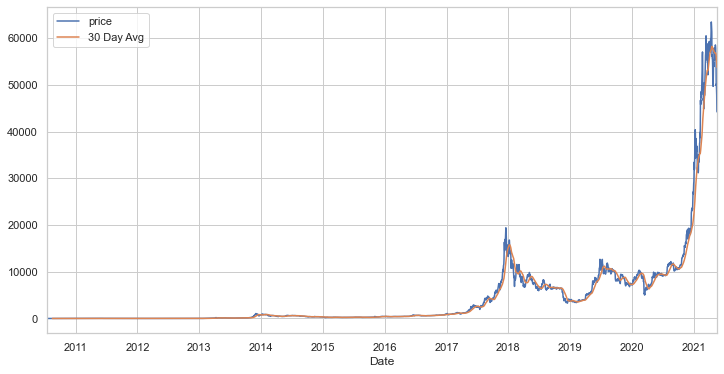

In [7]:
# Visulising the price of BTC 30 day average basis
sns.set()
sns.set_style('whitegrid')
df['priceUSD'].plot(figsize=(12,6),label='price')
df['priceUSD'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
plt.legend()
plt.show()

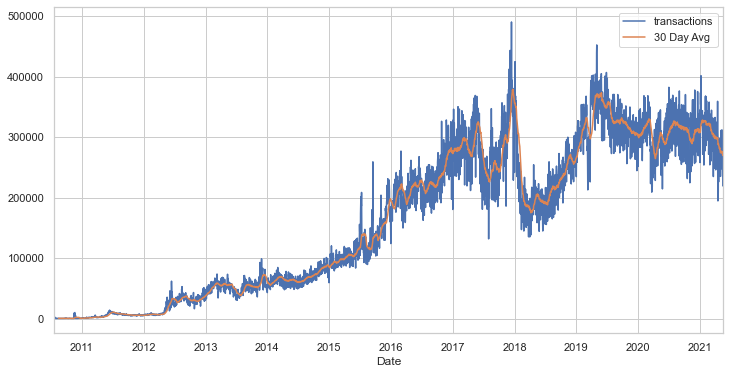

In [8]:
# ploting the no of tractions on 30 average basis
sns.set()
sns.set_style('whitegrid')
df['transactions'].plot(figsize=(12,6),label='transactions')
df['transactions'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
plt.legend()
plt.show()

In [9]:
# statistcs 
from tabulate import tabulate
info = [[col, df[col].count(), df[col].max(), df[col].min(),df[col].mean()] for col in df.columns]
#print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min','Mean'], tablefmt = 'orgtbl'))

In [10]:
df1=df.reset_index(drop=True)
X=df1.drop('priceUSD', 1)
X

,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,248,765.285,424,1.815430e+02,1.554461e+09,401834.000,2.612000e+03,0.000243,0.000,8.372,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,354,756.040,553,1.815430e+02,1.551287e+09,481473.000,4.047000e+03,0.000022,0.000,8.276,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,413,984.707,632,1.815430e+02,1.640430e+09,431831.000,2.341000e+03,0.000000,0.000,7.956,...,82.751,0.000,0.000,0.000,0.000,58.099,0.000,0.000,0.000,0.000
3,256,542.483,440,1.815430e+02,1.723493e+09,460783.000,2.122000e+03,0.000000,0.000,6.957,...,78.603,0.000,0.000,0.000,0.000,5.652,0.000,0.000,0.000,0.000
4,221,491.903,412,1.815430e+02,1.705481e+09,334641.000,2.570000e+03,0.000000,0.000,8.182,...,49.814,0.000,0.000,0.000,0.000,-24.455,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,265921,883117.000,516752,2.504650e+13,1.770000e+20,0.258,5.677290e+10,13.823000,5.784,10.746,...,11.496,24.835,35.381,44.086,53.217,-10.146,-11.674,-9.184,-20.892,6.171
3954,231976,882398.000,418333,2.504650e+13,1.670000e+20,0.243,4.490559e+10,13.159000,5.335,11.707,...,8.449,21.733,33.004,42.636,52.528,-12.662,-16.492,-15.422,-22.297,0.627
3955,219303,874337.000,359714,2.504650e+13,1.580000e+20,0.266,3.476459e+10,11.340000,4.767,10.909,...,6.280,19.292,31.053,41.413,51.937,-4.236,-17.667,-16.044,-22.668,-0.242
3956,250789,887113.000,369740,2.504650e+13,1.530000e+20,0.242,5.529356e+10,13.469000,6.012,11.901,...,2.919,13.861,26.087,38.037,50.227,-11.654,-23.245,-23.442,-27.678,-9.230


In [11]:
y=df1[["priceUSD"]]
y

,priceUSD
0,0.0726
1,0.0859
2,0.0783
3,0.0767
4,0.0649
...,...
3953,50185.0000
3954,48875.0000
3955,47738.0000
3956,44336.0000


# Dropping those features which is highly correlated each other.

In [12]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [13]:
# Drop features 
X.drop(X[to_drop], axis=1,inplace=True)

In [14]:
X_columns=list(X.columns)
y_columns=["priceUSD"]

In [15]:
correlation_result={}
for i in range(len(X_columns)):
    correlation = X[X_columns[i]].corr(y["priceUSD"])
    correlation_result[X_columns[i]]=correlation
correlation_result=sorted(correlation_result.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

In [16]:
temp=[]
for i in correlation_result:
    temp.append(i[0])
X_train2=X[temp]
X_train2

,sentinusdUSD,difficulty,difficulty90mom,price30momUSD,sentinusd90momUSD,transactions,difficulty14std,transactionvalue3stdUSD,mining_profitability90trx,activeaddresses7std,...,mining_profitability,sentbyaddress14trx,hashrate3trx,top100cap90std,difficulty3trx,transactions30trx,transactions90mom,mining_profitability90sma,sentbyaddress30trx,transactions90trx
0,2.612000e+03,1.815430e+02,1.737230e+02,0.0,0.000000e+00,248,1.079720e+02,0.000,0.000,3836.000,...,401834.000,13.249,14.367,3.855,46.606,9.590,204,0.000,4.719,1.942
1,4.047000e+03,1.815430e+02,1.737230e+02,0.0,0.000000e+00,354,1.247640e+02,3.972,0.000,3872.000,...,481473.000,11.086,4.890,3.807,30.397,9.526,316,0.000,4.892,2.078
2,2.341000e+03,1.815430e+02,1.735570e+02,0.0,0.000000e+00,413,1.360760e+02,3.070,0.000,3973.000,...,431831.000,9.201,1.182,3.760,19.000,9.253,381,0.000,4.951,2.200
3,2.122000e+03,1.815430e+02,1.700790e+02,0.0,0.000000e+00,256,1.430260e+02,3.252,0.000,910.003,...,460783.000,7.508,0.390,3.707,11.819,8.818,216,0.000,4.904,2.306
4,2.570000e+03,1.815430e+02,1.700790e+02,0.0,0.000000e+00,221,1.462080e+02,2.151,0.000,652.409,...,334641.000,6.020,0.151,3.649,7.335,8.290,171,0.000,4.779,2.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,5.677290e+10,2.504650e+13,3.612090e+12,-13253.0,4.119586e+10,265921,2.720660e+12,143815.000,0.584,156809.000,...,0.258,0.517,0.333,0.722,3.392,-0.151,-70546,0.353,-0.017,-0.050
3954,4.490559e+10,2.504650e+13,3.612090e+12,-14025.0,2.933329e+10,231976,3.242820e+12,38165.000,0.578,214115.000,...,0.243,0.447,-0.915,0.734,3.820,-0.147,-63304,0.353,-0.009,-0.051
3955,3.476459e+10,2.504650e+13,3.612090e+12,-13993.0,1.328463e+10,219303,3.695760e+12,29877.000,0.571,245559.000,...,0.266,0.308,-2.201,0.743,3.324,-0.150,-91867,0.352,-0.011,-0.053
3956,5.529356e+10,2.504650e+13,3.612090e+12,-16968.0,3.040943e+10,250789,3.999700e+12,53154.000,0.563,211186.000,...,0.242,0.136,-2.967,0.756,2.537,-0.153,-45478,0.351,-0.020,-0.054


In [17]:
top_20_features=[]
for i in range(20):
    top_20_features.append(correlation_result[i][0])

# selecting top 20 features

In [18]:
top_20_features
X_train=X[top_20_features]

In [19]:
#refhttps://stackoverflow.com/questions/39409866/correlation-heatmap
# calculate the correlation matrix
corr = X_train.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,sentinusdUSD,difficulty,difficulty90mom,price30momUSD,sentinusd90momUSD,transactions,difficulty14std,transactionvalue3stdUSD,mining_profitability90trx,activeaddresses7std,hashrate90mom,fee_to_reward3stdUSD,activeaddresses3std,transactions3std,difficulty7std,price14momUSD,mining_profitability30trx,difficulty30mom,transactionvalue30momUSD,sentinusd30momUSD
sentinusdUSD,1.00,0.62,0.45,0.45,0.71,0.53,0.42,0.49,0.51,0.50,0.37,0.49,0.42,0.42,0.34,0.29,0.36,0.27,0.35,0.51
difficulty,0.62,1.00,0.66,0.35,0.29,0.64,0.64,0.40,0.35,0.52,0.54,0.44,0.45,0.44,0.44,0.22,0.26,0.39,0.21,0.17
difficulty90mom,0.45,0.66,1.00,0.13,0.10,0.47,0.33,0.35,0.32,0.43,0.70,0.26,0.36,0.34,0.25,0.05,0.12,0.64,0.09,0.04
price30momUSD,0.45,0.35,0.13,1.00,0.46,0.26,0.07,0.22,0.26,0.26,0.15,0.31,0.21,0.18,0.01,0.69,0.35,0.10,0.34,0.42
sentinusd90momUSD,0.71,0.29,0.10,0.46,1.00,0.25,0.16,0.30,0.31,0.24,0.08,0.33,0.19,0.19,0.17,0.32,0.40,0.10,0.38,0.57
transactions,0.53,0.64,0.47,0.26,0.25,1.00,0.41,0.31,0.37,0.68,0.43,0.47,0.57,0.69,0.26,0.18,0.36,0.29,0.12,0.16
difficulty14std,0.42,0.64,0.33,0.07,0.16,0.41,1.00,0.25,0.23,0.36,0.27,0.28,0.29,0.30,0.68,0.08,0.14,0.07,0.07,0.07
transactionvalue3stdUSD,0.49,0.40,0.35,0.22,0.30,0.31,0.25,1.00,0.31,0.34,0.28,0.30,0.29,0.26,0.22,0.12,0.17,0.20,0.45,0.18
mining_profitability90trx,0.51,0.35,0.32,0.26,0.31,0.37,0.23,0.31,1.00,0.33,0.29,0.38,0.27,0.32,0.16,0.15,0.46,0.21,0.14,0.10
activeaddresses7std,0.50,0.52,0.43,0.26,0.24,0.68,0.36,0.34,0.33,1.00,0.33,0.47,0.73,0.58,0.27,0.25,0.25,0.23,0.21,0.15


In [20]:
X_train=df[top_20_features]
X_train.head()

,sentinusdUSD,difficulty,difficulty90mom,price30momUSD,sentinusd90momUSD,transactions,difficulty14std,transactionvalue3stdUSD,mining_profitability90trx,activeaddresses7std,hashrate90mom,fee_to_reward3stdUSD,activeaddresses3std,transactions3std,difficulty7std,price14momUSD,mining_profitability30trx,difficulty30mom,transactionvalue30momUSD,sentinusd30momUSD
Date,,,,,,,,,,,,,,,,,,,,
2010-07-18,2612.0,181.543,173.723,0.0,0.0,248,107.972,0.000,0.0,3836.000,1.467781e+09,0.000,806.213,409.788,127.594,0.0,0.0,164.162,0.0,0.0
2010-07-19,4047.0,181.543,173.723,0.0,0.0,354,124.764,3.972,0.0,3872.000,1.466614e+09,0.014,139.870,106.596,133.874,0.0,0.0,164.162,0.0,0.0
2010-07-20,2341.0,181.543,173.557,0.0,0.0,413,136.076,3.070,0.0,3973.000,1.553496e+09,0.015,57.743,136.532,129.582,0.0,0.0,164.162,0.0,0.0
2010-07-21,2122.0,181.543,170.079,0.0,0.0,256,143.026,3.252,0.0,910.003,1.613749e+09,0.001,133.889,129.502,115.703,0.0,0.0,164.162,0.0,0.0
2010-07-22,2570.0,181.543,170.079,0.0,0.0,221,146.208,2.151,0.0,652.409,1.621318e+09,0.000,256.262,166.984,83.403,0.0,0.0,164.162,0.0,0.0


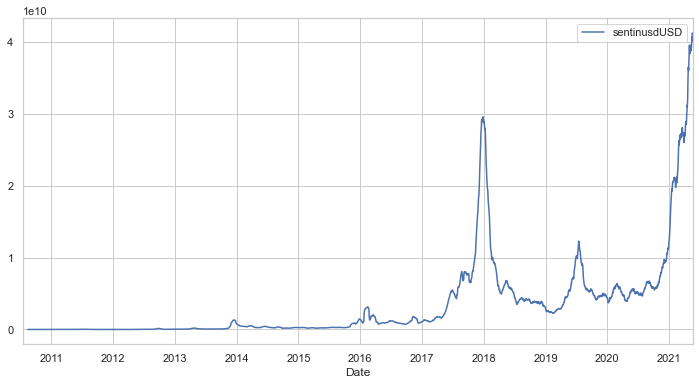

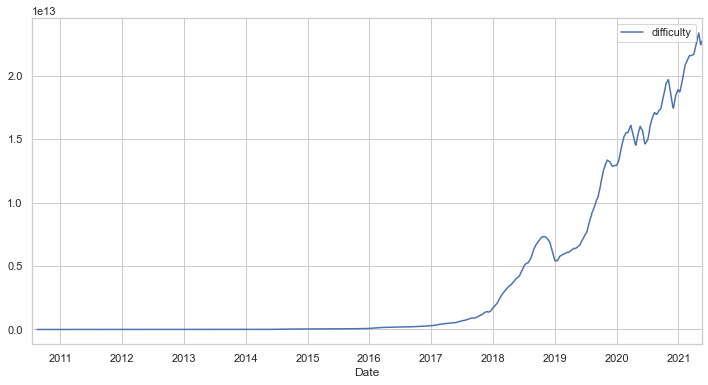

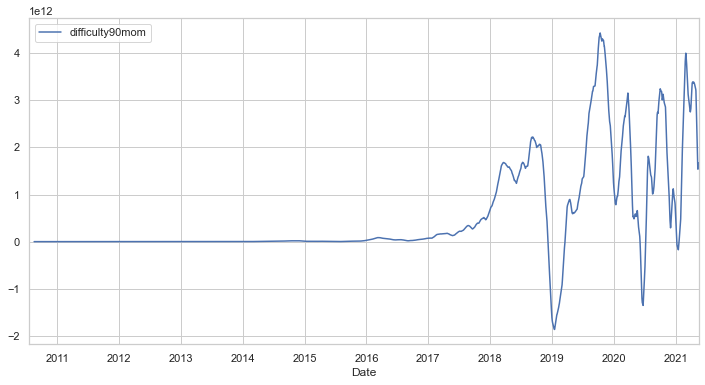

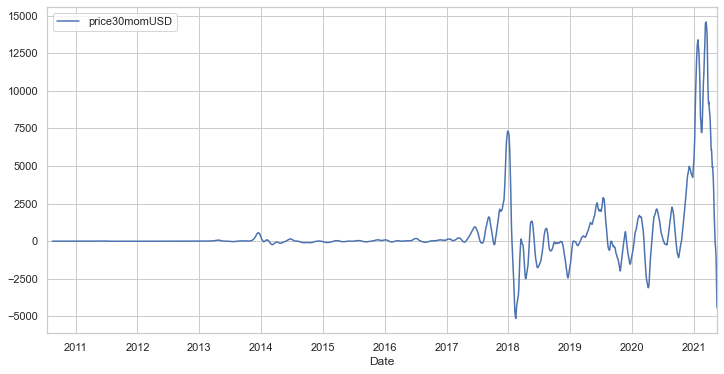

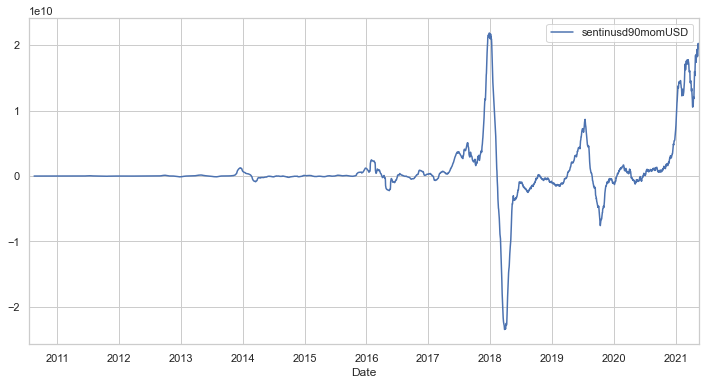

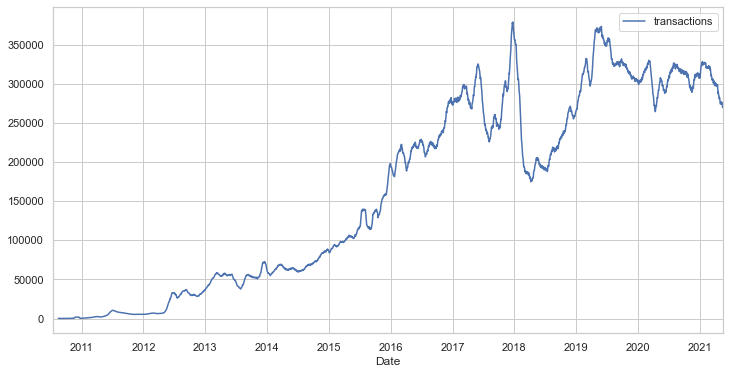

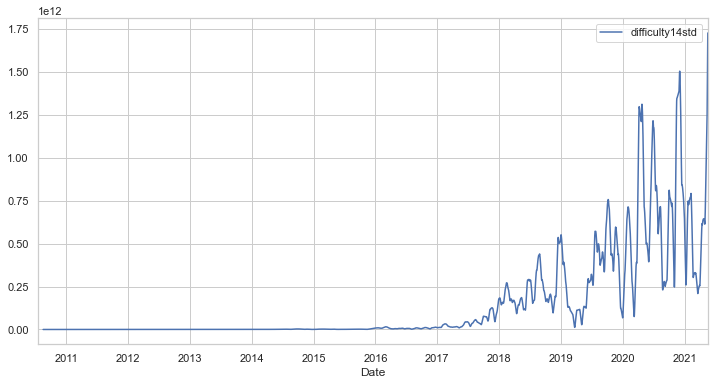

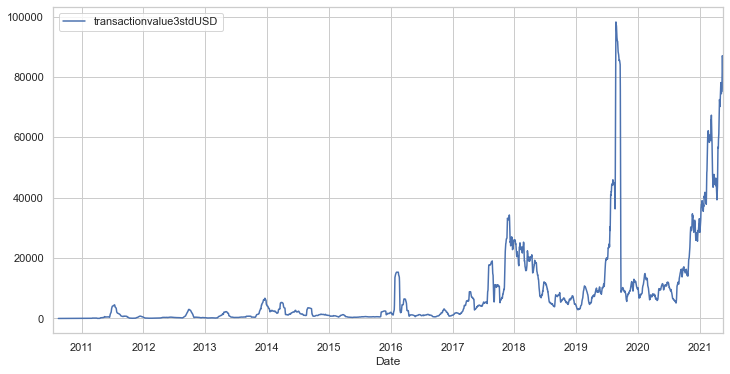

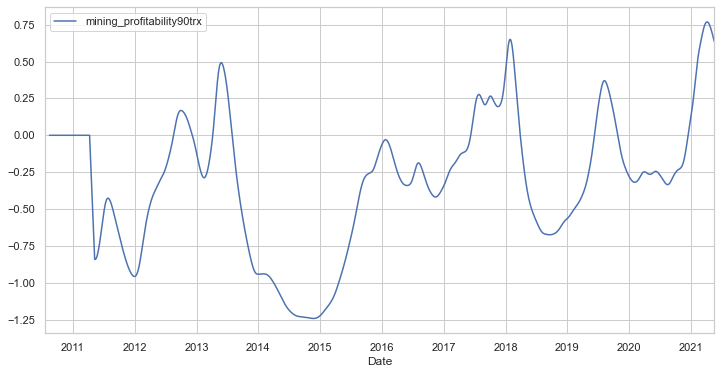

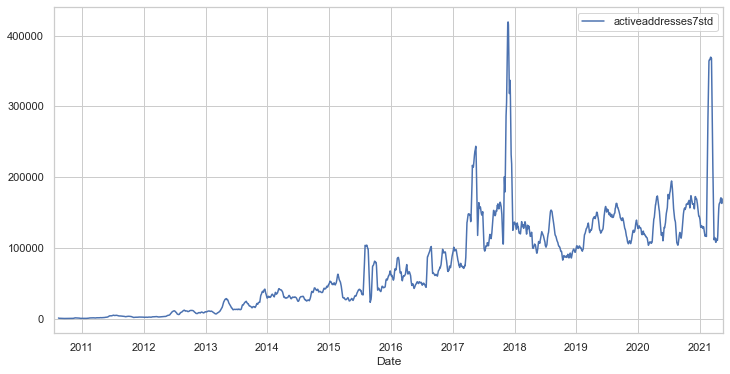

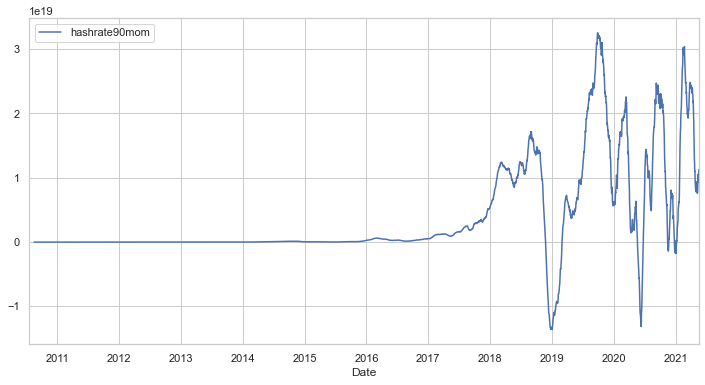

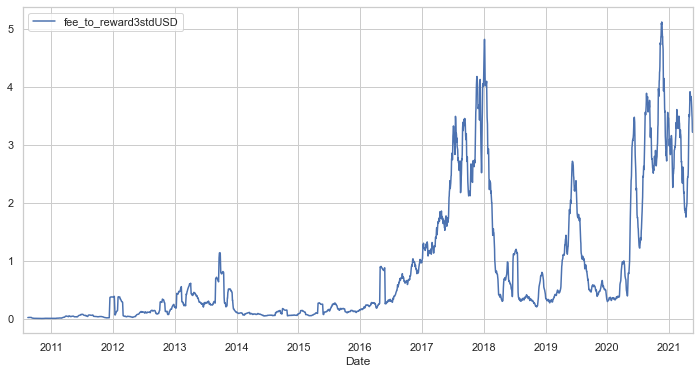

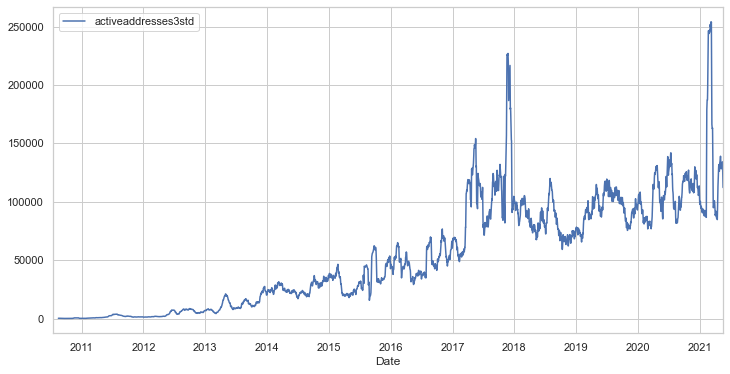

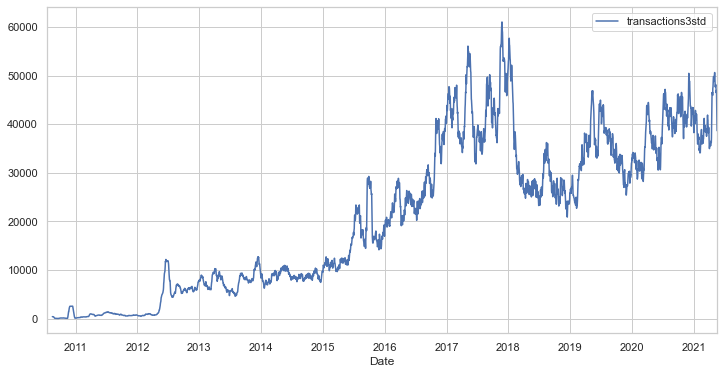

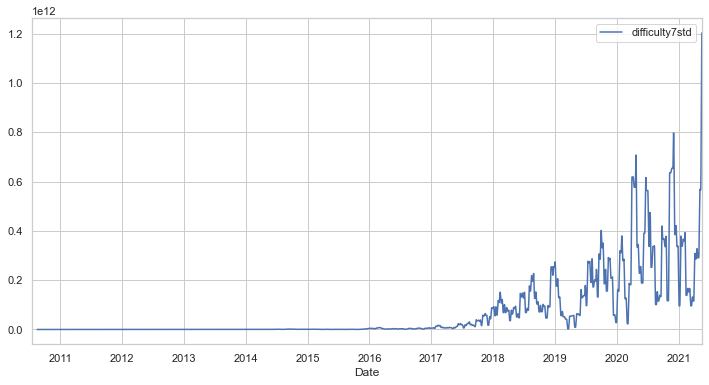

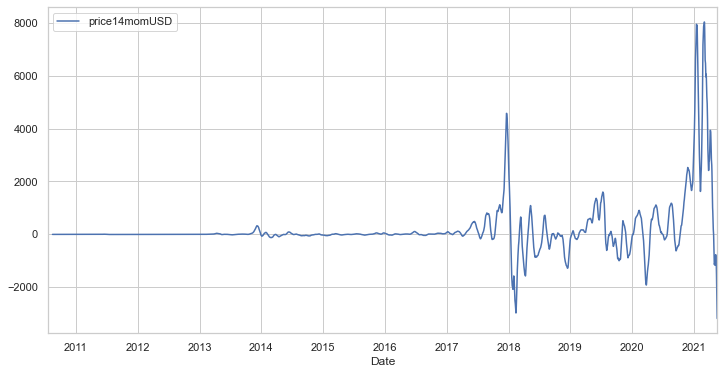

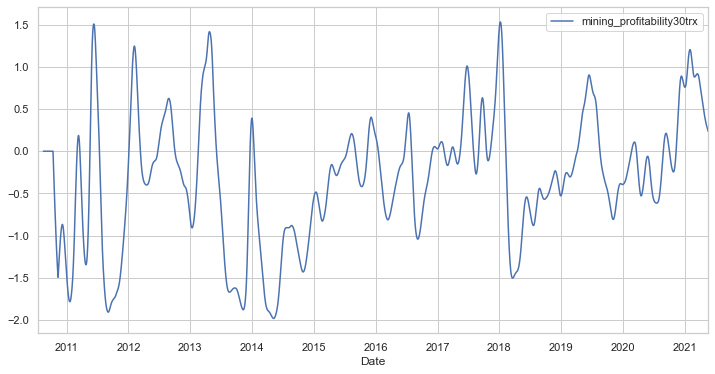

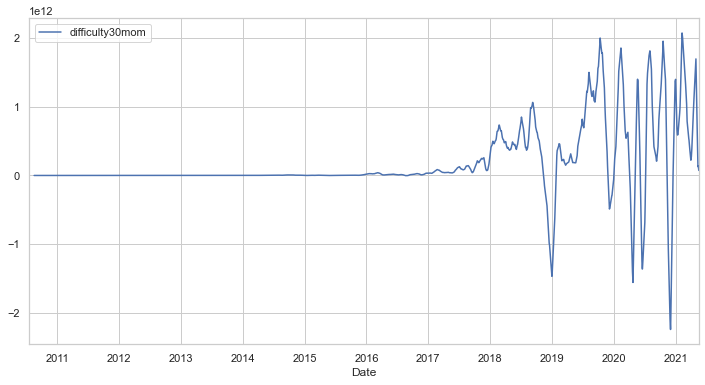

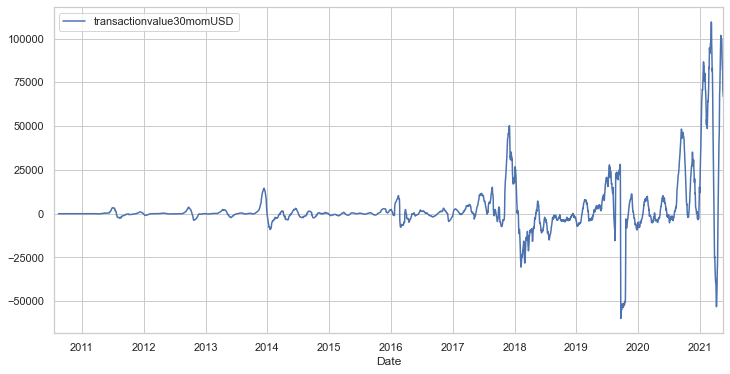

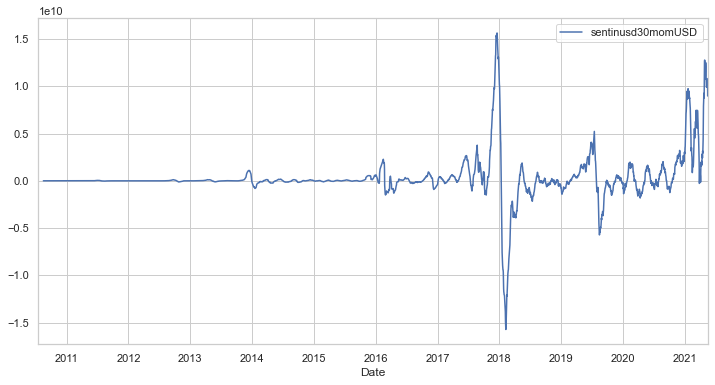

In [21]:
# Visulising the price of BTC 30 day average basis
features=list(X_train.columns)
for i in features:
    sns.set()
    sns.set_style('whitegrid')
    X_train[i].rolling(window=30).mean().plot(figsize=(12,6),label=i)
    plt.legend()
    plt.show()

In [22]:
estimators=[]
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])
scale=Pipeline(estimators)
X_min_max=scale.fit_transform(X_train2)
y_min_max=scale.fit_transform(y)

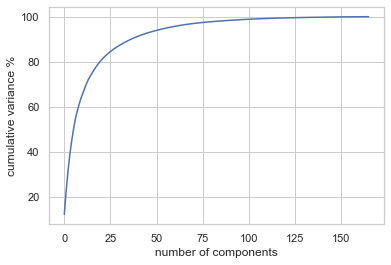

In [23]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0).fit(X_min_max)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative variance %')
plt.show()

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12235006, 0.22466107, 0.31384363, 0.38837803, 0.448368  ,
       0.49968784, 0.54708363, 0.57996502, 0.61001433, 0.63643551,
       0.65913352, 0.6814583 , 0.702121  , 0.72037048, 0.73518432,
       0.74893396, 0.76208134, 0.77481062, 0.78627468, 0.7971831 ,
       0.80657369, 0.81543305, 0.82399194, 0.83127441, 0.83838487,
       0.84526086, 0.85158487, 0.85745491, 0.86295023, 0.86825624,
       0.87330823, 0.87798362, 0.88260991, 0.88710884, 0.89142513,
       0.895587  , 0.89946313, 0.90315975, 0.90668581, 0.91005585,
       0.91326376, 0.91636113, 0.91938224, 0.92227488, 0.92502734,
       0.9276277 , 0.93013678, 0.93254177, 0.93491167, 0.93710932,
       0.9392616 , 0.94136289, 0.94342674, 0.94538799, 0.9473439 ,
       0.94920929, 0.95098634, 0.95266357, 0.9543028 , 0.95590432,
       0.95748898, 0.95897826, 0.96040191, 0.96181482, 0.96310529,
       0.9643568 , 0.96557914, 0.96671733, 0.96782232, 0.96891139,
       0.9699223 , 0.9708753 , 0.97179986, 0.97266659, 0.97348

# Next task is to select important features

# Features selection using Extra tree Regressor

In [25]:
#ref https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, random_state=0)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
clf = ExtraTreesRegressor(n_estimators=50, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9986646309855625

In [26]:
feature_importances=[]
for i in clf.feature_importances_:
    feature_importances.append('{:f}'.format(float(i)))

In [27]:
count=0
sum=0
index=[]
for i in range(len(feature_importances)):
    if float(feature_importances[i])>=0.001299:
        #print(i," ",feature_importances[i])
        count+=1
        sum+=float(feature_importances[i])
        index.append(i)

In [28]:
feature_=list(X.columns)
print("List of important features are: ",[feature_[i] for i in index],"\n")
print(sum*100,"%")
print("number of important features usind tree classifier \n",count)

List of important features are:  ['transactions', 'difficulty', 'mining_profitability', 'sentinusdUSD', 'confirmationtime', 'transactions3trx', 'transactions7trx', 'transactions14trx', 'transactions30trx', 'transactions3mom', 'transactions3std', 'transactions3rsi', 'transactions3roc', 'size3std', 'difficulty30mom', 'mining_profitability3std', 'transactionfees3rocUSD', 'transactionfees14rocUSD', 'median_transaction_fee3rsiUSD', 'top100cap14mom', 'top100cap3rsi', 'fee_to_reward3stdUSD', 'price3momUSD', 'price14momUSD', 'price30momUSD', 'price3rsiUSD'] 

98.35160000000003 %
number of important features usind tree classifier 
 26


# Top 20 feature using correlation method

In [29]:
print(top_20_features)

['sentinusdUSD', 'difficulty', 'difficulty90mom', 'price30momUSD', 'sentinusd90momUSD', 'transactions', 'difficulty14std', 'transactionvalue3stdUSD', 'mining_profitability90trx', 'activeaddresses7std', 'hashrate90mom', 'fee_to_reward3stdUSD', 'activeaddresses3std', 'transactions3std', 'difficulty7std', 'price14momUSD', 'mining_profitability30trx', 'difficulty30mom', 'transactionvalue30momUSD', 'sentinusd30momUSD']


In [30]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
print("common important features are")
imp_feature_=intersection(feature_, top_20_features)
print(imp_feature_)
print("Total imp features are",len(imp_feature_))

common important features are
['sentinusd90momUSD', 'hashrate90mom', 'mining_profitability90trx', 'mining_profitability30trx', 'transactions3std', 'activeaddresses3std', 'price14momUSD', 'difficulty', 'transactionvalue30momUSD', 'sentinusd30momUSD', 'difficulty90mom', 'transactionvalue3stdUSD', 'difficulty14std', 'activeaddresses7std', 'difficulty30mom', 'difficulty7std', 'transactions', 'price30momUSD', 'sentinusdUSD', 'fee_to_reward3stdUSD']
Total imp features are 20


# Feature engineering

In [31]:
train_data_=df[["priceUSD",'sentinusd90momUSD', 'hashrate90mom', 'difficulty90mom', 'activeaddresses7std', 'difficulty7std', 'price14momUSD', 'sentinusdUSD', 'transactionvalue3stdUSD', 'activeaddresses3std', 'transactions3std', 'price30momUSD', 'fee_to_reward3stdUSD', 'mining_profitability90trx', 'sentinusd30momUSD', 'transactionvalue30momUSD', 'transactions', 'difficulty', 'difficulty14std', 'difficulty30mom', 'mining_profitability30trx']]


In [32]:
train_data_

,priceUSD,sentinusd90momUSD,hashrate90mom,difficulty90mom,activeaddresses7std,difficulty7std,price14momUSD,sentinusdUSD,transactionvalue3stdUSD,activeaddresses3std,...,price30momUSD,fee_to_reward3stdUSD,mining_profitability90trx,sentinusd30momUSD,transactionvalue30momUSD,transactions,difficulty,difficulty14std,difficulty30mom,mining_profitability30trx
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.0726,0.000000e+00,1.467781e+09,1.737230e+02,3836.000,1.275940e+02,0.0,2.612000e+03,0.000,806.213,...,0.0,0.000,0.000,0.000000e+00,0.0,248,1.815430e+02,1.079720e+02,1.641620e+02,0.000
2010-07-19,0.0859,0.000000e+00,1.466614e+09,1.737230e+02,3872.000,1.338740e+02,0.0,4.047000e+03,3.972,139.870,...,0.0,0.014,0.000,0.000000e+00,0.0,354,1.815430e+02,1.247640e+02,1.641620e+02,0.000
2010-07-20,0.0783,0.000000e+00,1.553496e+09,1.735570e+02,3973.000,1.295820e+02,0.0,2.341000e+03,3.070,57.743,...,0.0,0.015,0.000,0.000000e+00,0.0,413,1.815430e+02,1.360760e+02,1.641620e+02,0.000
2010-07-21,0.0767,0.000000e+00,1.613749e+09,1.700790e+02,910.003,1.157030e+02,0.0,2.122000e+03,3.252,133.889,...,0.0,0.001,0.000,0.000000e+00,0.0,256,1.815430e+02,1.430260e+02,1.641620e+02,0.000
2010-07-22,0.0649,0.000000e+00,1.621318e+09,1.700790e+02,652.409,8.340300e+01,0.0,2.570000e+03,2.151,256.262,...,0.0,0.000,0.000,0.000000e+00,0.0,221,1.815430e+02,1.462080e+02,1.641620e+02,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,50185.0000,4.119586e+10,1.960000e+19,3.612090e+12,156809.000,3.332650e+12,-5075.0,5.677290e+10,143815.000,170903.000,...,-13253.0,1.290,0.584,7.143734e+09,43097.0,265921,2.504650e+13,2.720660e+12,1.909050e+12,0.158
2021-05-15,48875.0000,2.933329e+10,-2.920000e+18,3.612090e+12,214115.000,3.954700e+12,-8912.0,4.490559e+10,38165.000,178679.000,...,-14025.0,1.134,0.578,8.096101e+09,81606.0,231976,2.504650e+13,3.242820e+12,1.828930e+12,0.132
2021-05-16,47738.0000,1.328463e+10,4.030000e+18,3.612090e+12,245559.000,4.117970e+12,-9123.0,3.476459e+10,29877.000,63154.000,...,-13993.0,1.787,0.571,-1.727341e+10,-118810.0,219303,2.504650e+13,3.695760e+12,1.464510e+12,0.103


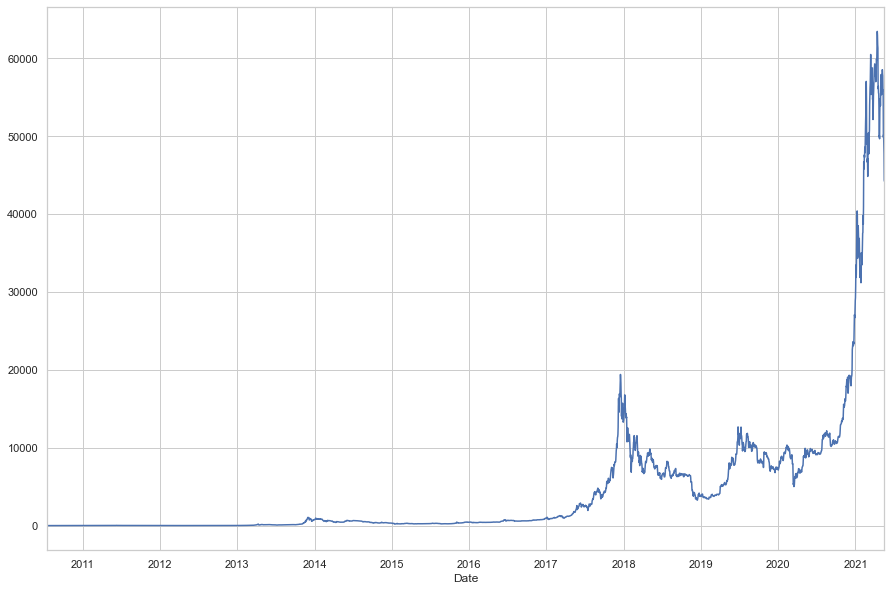

In [33]:
train_data_.sort_index()['2010':'2022']["priceUSD"].plot(subplots=True, figsize=(15,10))
plt.savefig('bitcoin.png')
plt.show()

# Percent change

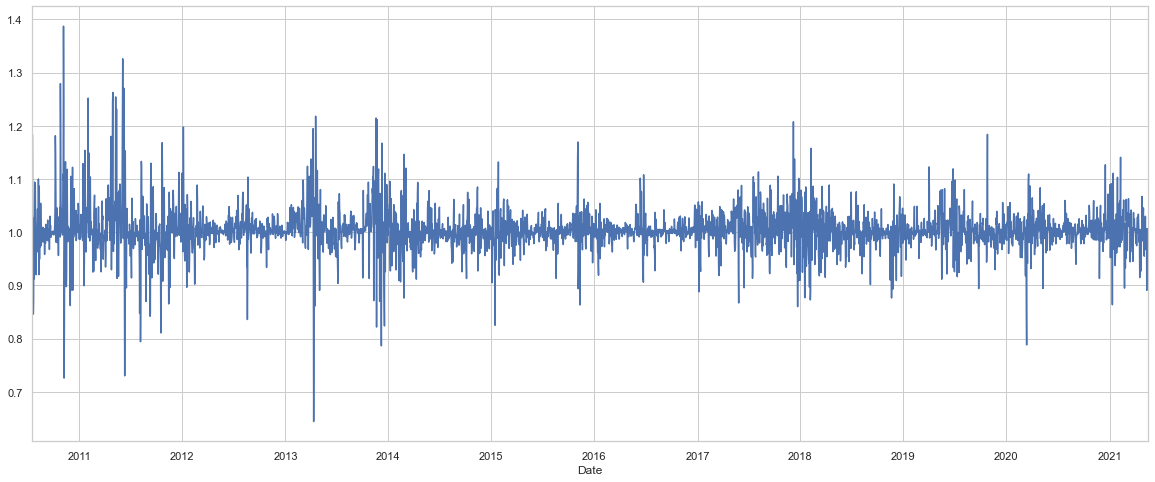

In [34]:
#train_data_['Change'] = train_data_.priceUSD.div(train_data_.priceUSD.shift())
train_data_ = train_data_.assign(Change=pd.Series(train_data_.priceUSD.div(train_data_.priceUSD.shift())))
train_data_['Change'].plot(figsize=(20,8))
plt.show()

# Expanding mean

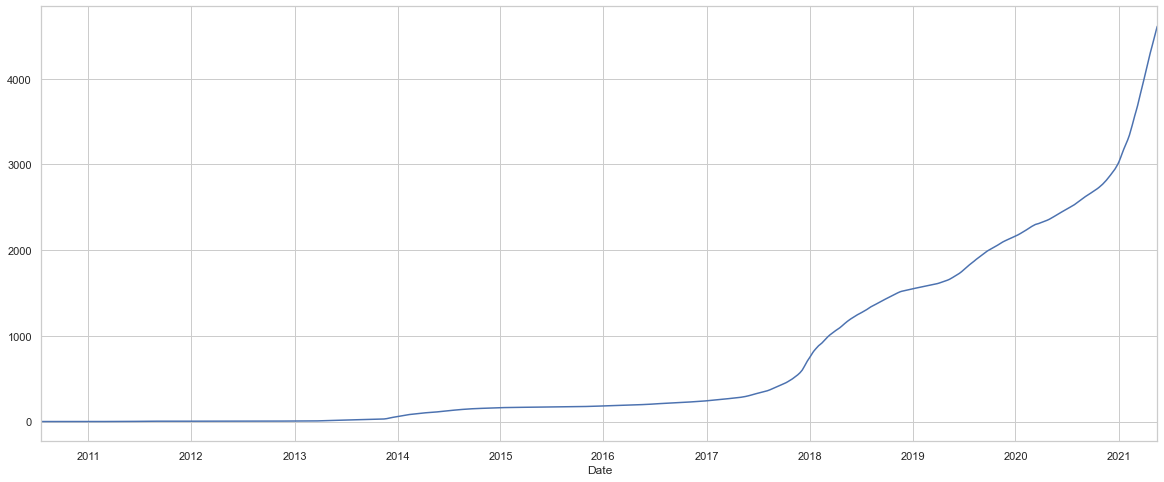

In [35]:
#train_data_['expanding_mean'] = train_data_['priceUSD'].expanding(1).mean()
train_data_ = train_data_.assign(expanding_mean=pd.Series(train_data_['priceUSD'].expanding(1).mean()))
train_data_['expanding_mean'].plot(figsize=(20,8))
plt.show()

# Lag feature

In [36]:
train_data_['lag_1'] = train_data_['priceUSD'].shift(1)
train_data_['lag_2'] = train_data_['priceUSD'].shift(2)
train_data_['lag_3'] = train_data_['priceUSD'].shift(3)
train_data_['lag_4'] = train_data_['priceUSD'].shift(4)
train_data_['lag_5'] = train_data_['priceUSD'].shift(5)
train_data_['lag_6'] = train_data_['priceUSD'].shift(6)
train_data_['lag_7'] = train_data_['priceUSD'].shift(7)

# Return

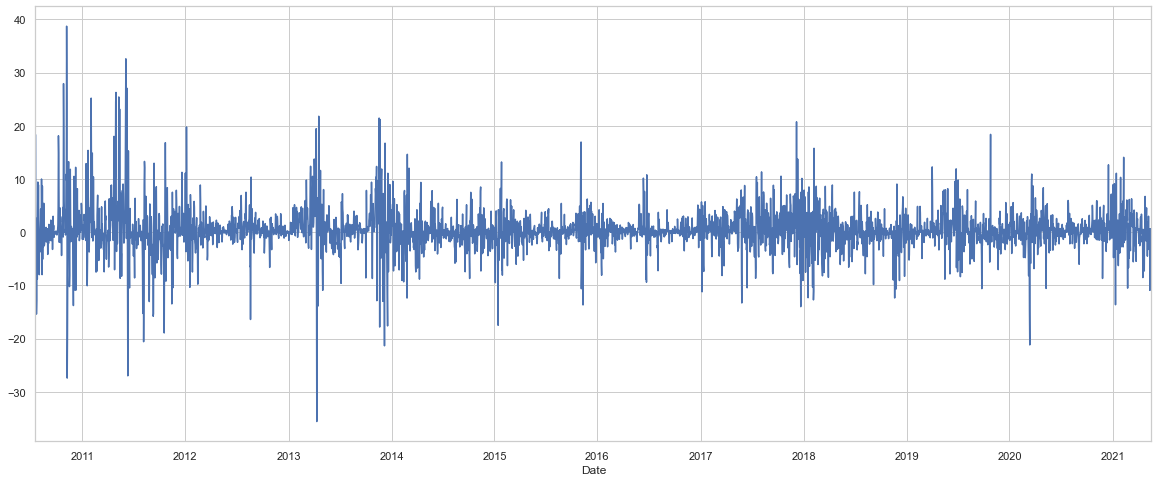

In [37]:
train_data_ = train_data_.assign(Return=pd.Series(train_data_.Change.sub(1).mul(100)))
train_data_['Return'].plot(figsize=(20,8))
plt.show()

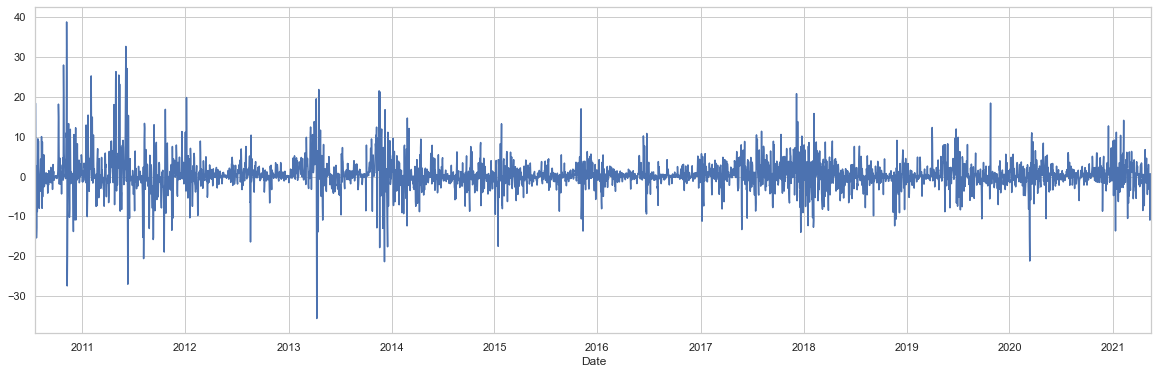

In [38]:
train_data_.priceUSD.pct_change().mul(100).plot(figsize=(20,6))
plt.show()

# Window functions

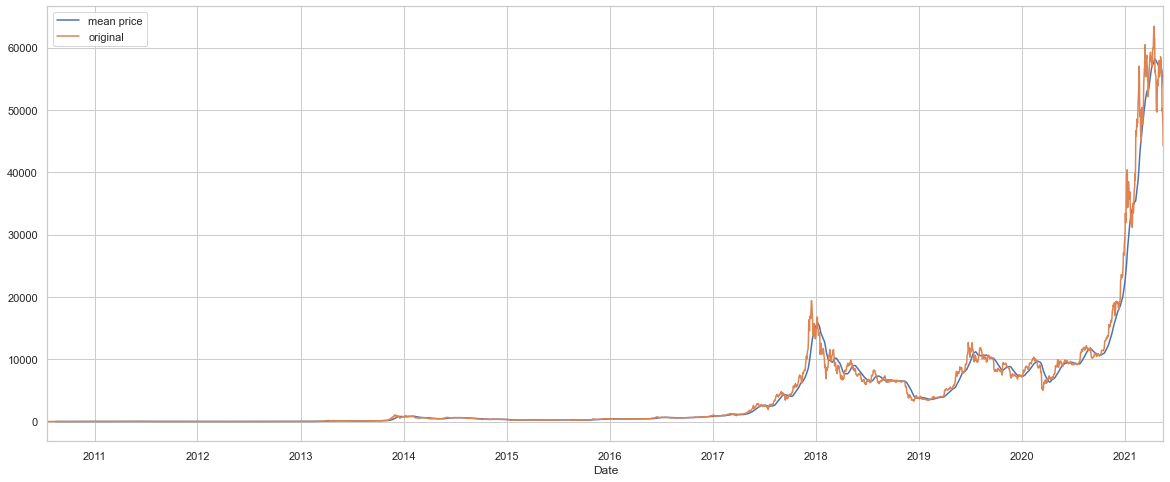

In [39]:
train_data_ = train_data_.assign(Mean=pd.Series(train_data_['priceUSD'].rolling(window=30).mean()))
train_data_['Mean'].plot(figsize=(20,8),label='mean price')
train_data_['priceUSD'].plot(label='original')
plt.legend()
plt.show()

# Time series decomposition and Random walks

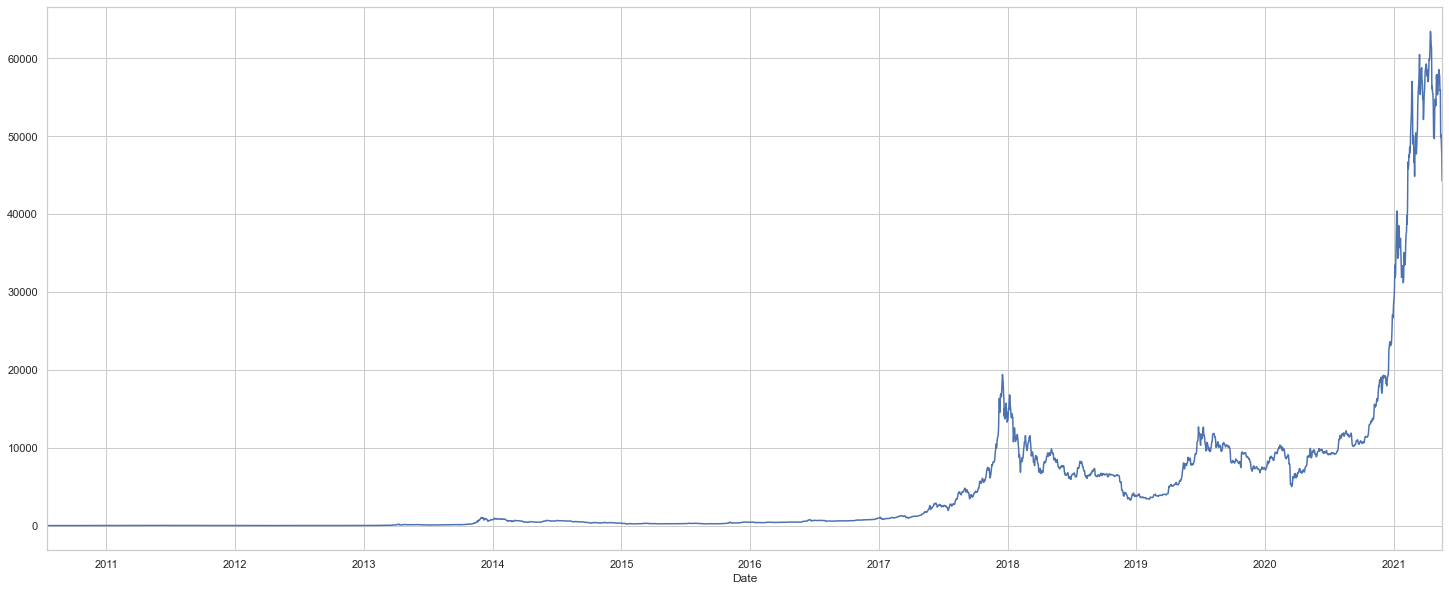

In [40]:
train_data_["priceUSD"].plot(figsize=(25,10))
plt.show()

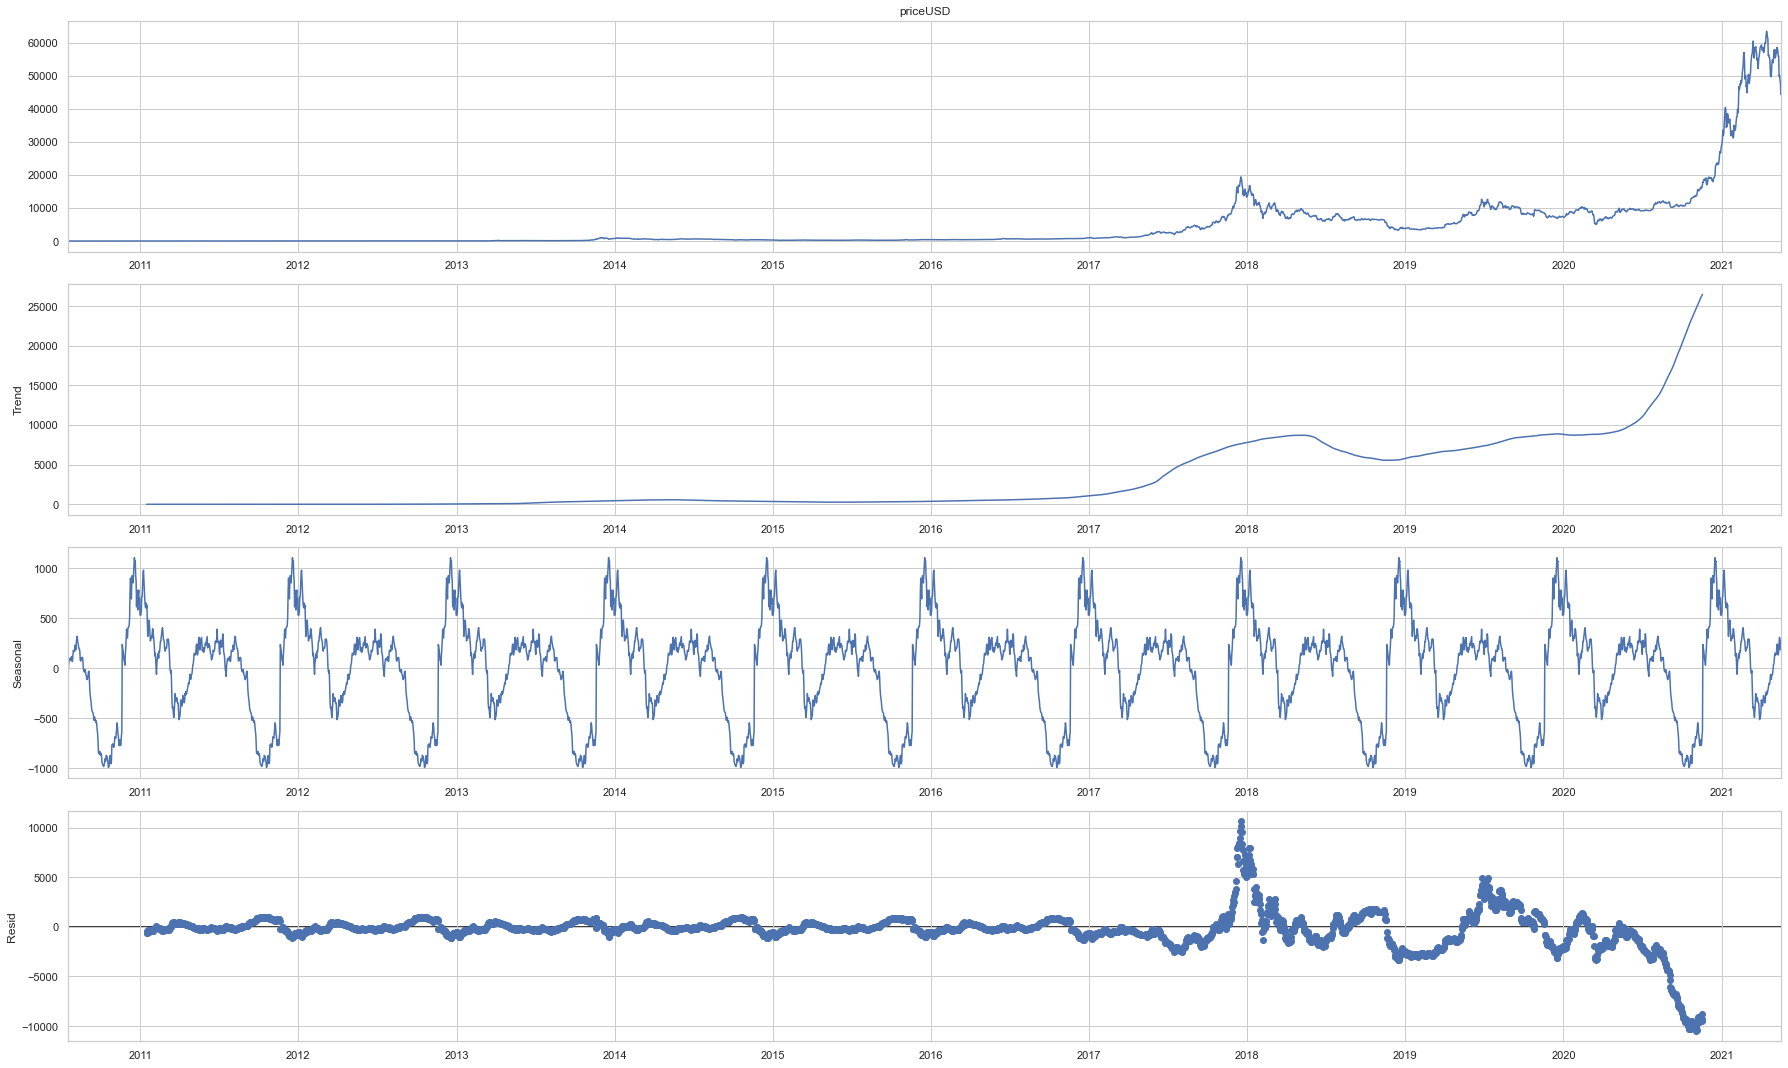

In [41]:
# Now, for decomposition...
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 25, 15
decomposed_train_data_ = sm.tsa.seasonal_decompose(train_data_["priceUSD"],period=365) # The frequncy is annual
figure = decomposed_train_data_.plot()
plt.show()

In [42]:
train_data_.isnull().values.any()

True

In [43]:
train_data_.dropna(axis = 0, how ='any',inplace=True)
train_data_.isnull().values.any()

False

In [44]:
train_data_["priceUSD"].describe()

count     3929.000000
mean      4648.282805
std       9643.745253
min          0.059900
25%         88.156000
50%        579.582000
75%       6666.000000
max      63438.000000
Name: priceUSD, dtype: float64

Text(0.5, 1.0, 'detrended by subtracting the least squares fit')

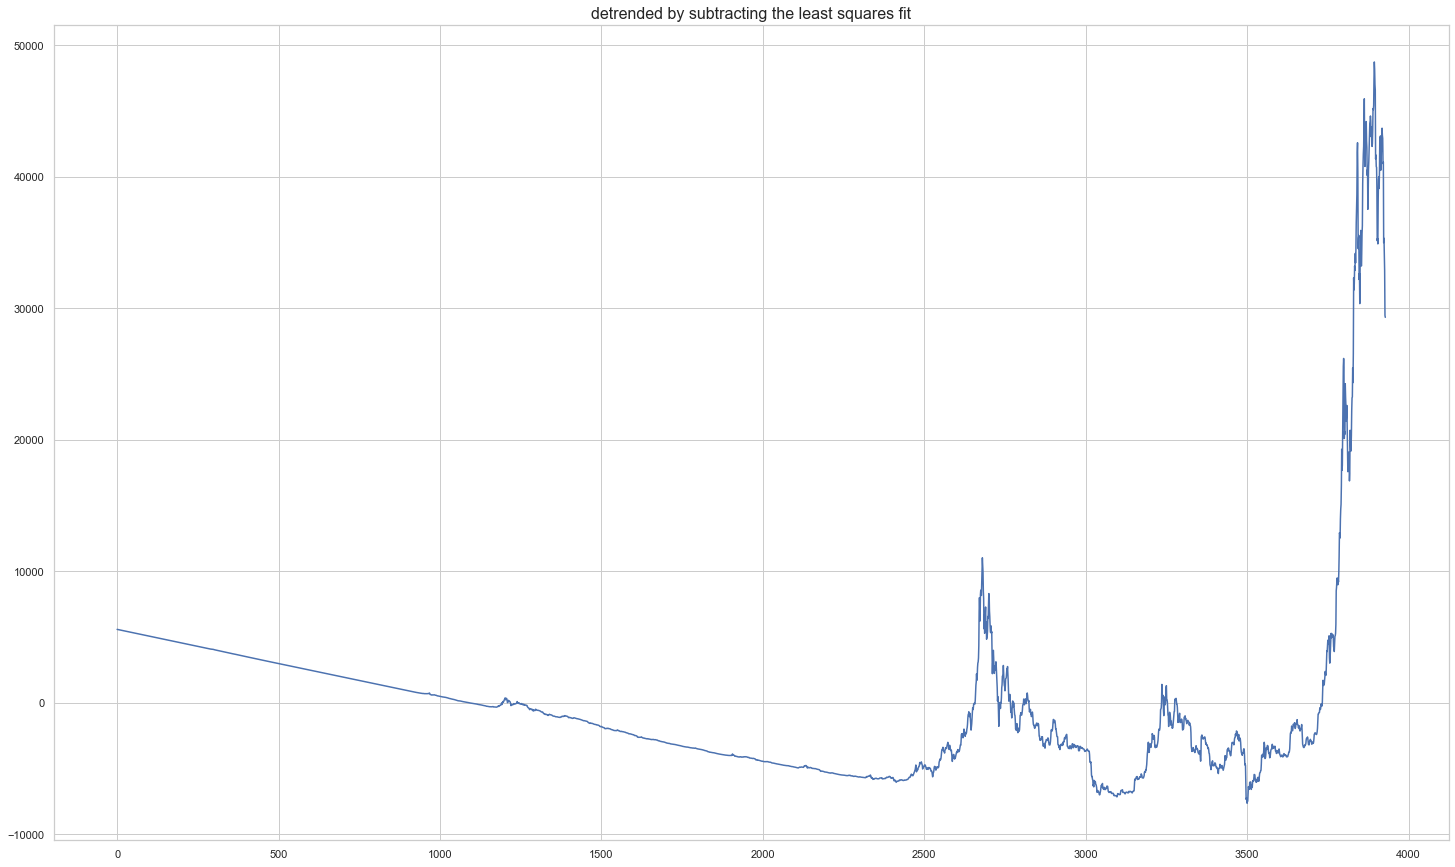

In [45]:

from scipy import signal
detrended = signal.detrend(train_data_["priceUSD"].values)
plt.plot(detrended)
plt.title('detrended by subtracting the least squares fit', fontsize=16)



In [46]:
# Plotting white noise
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
series = Series(train_data_["priceUSD"])
# summary stats
print(train_data_["priceUSD"].describe())

count     3929.000000
mean      4648.282805
std       9643.745253
min          0.059900
25%         88.156000
50%        579.582000
75%       6666.000000
max      63438.000000
Name: priceUSD, dtype: float64


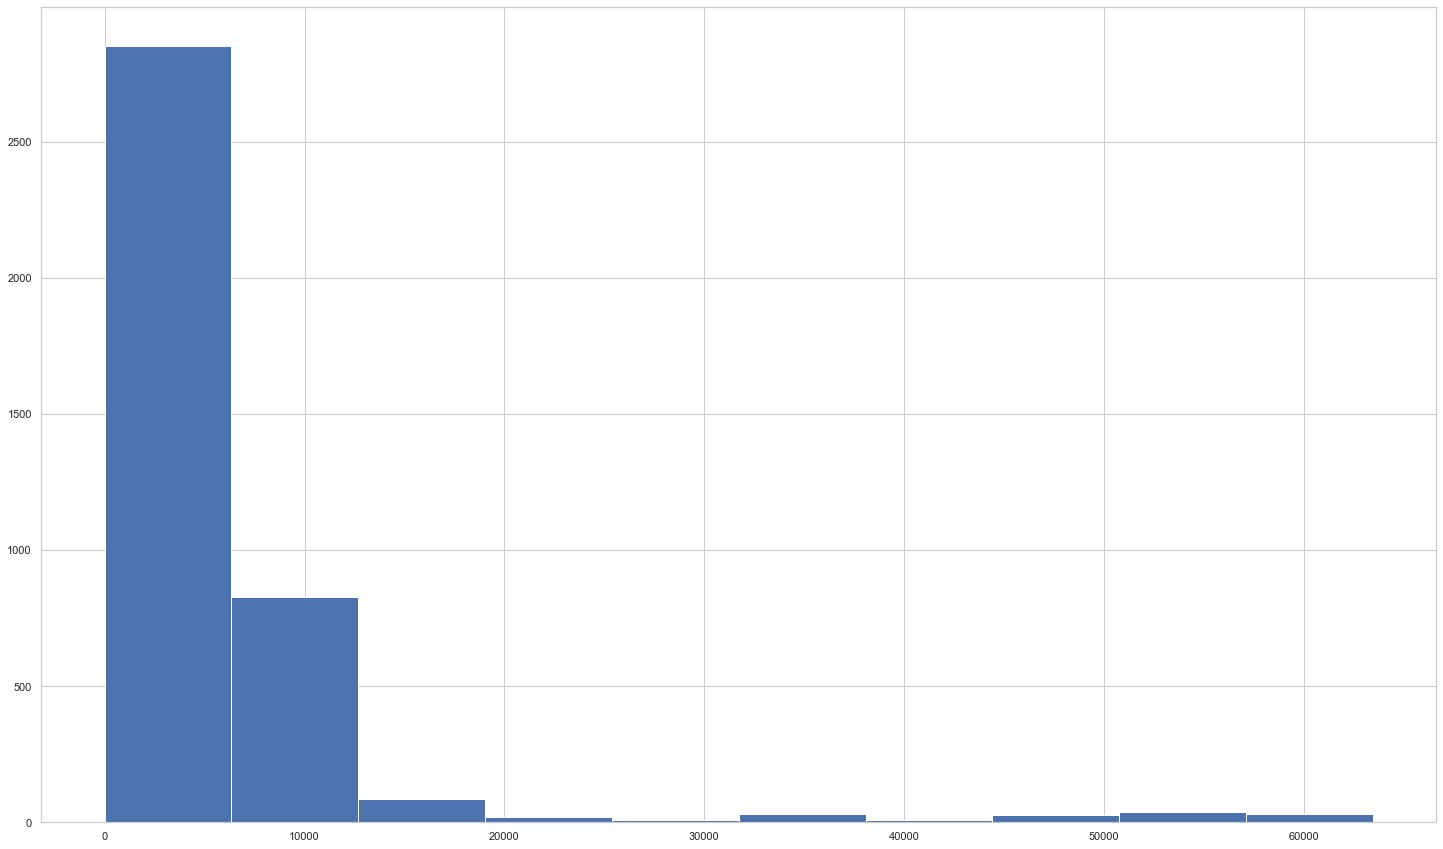

In [47]:
# histogram plot
series.hist()
plt.show()

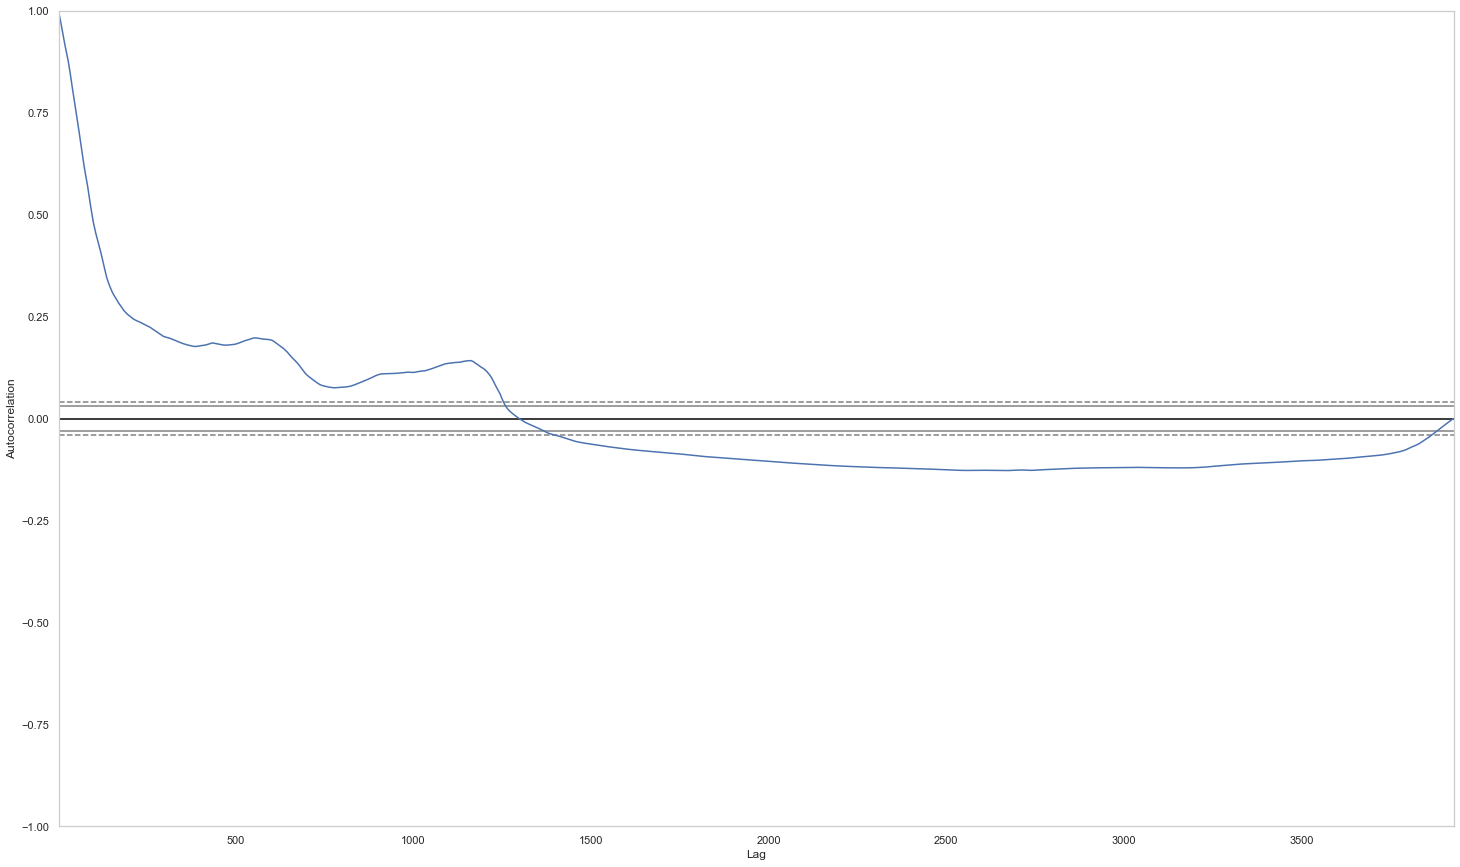

In [48]:
# autocorrelation
autocorrelation_plot(series)
plt.show()

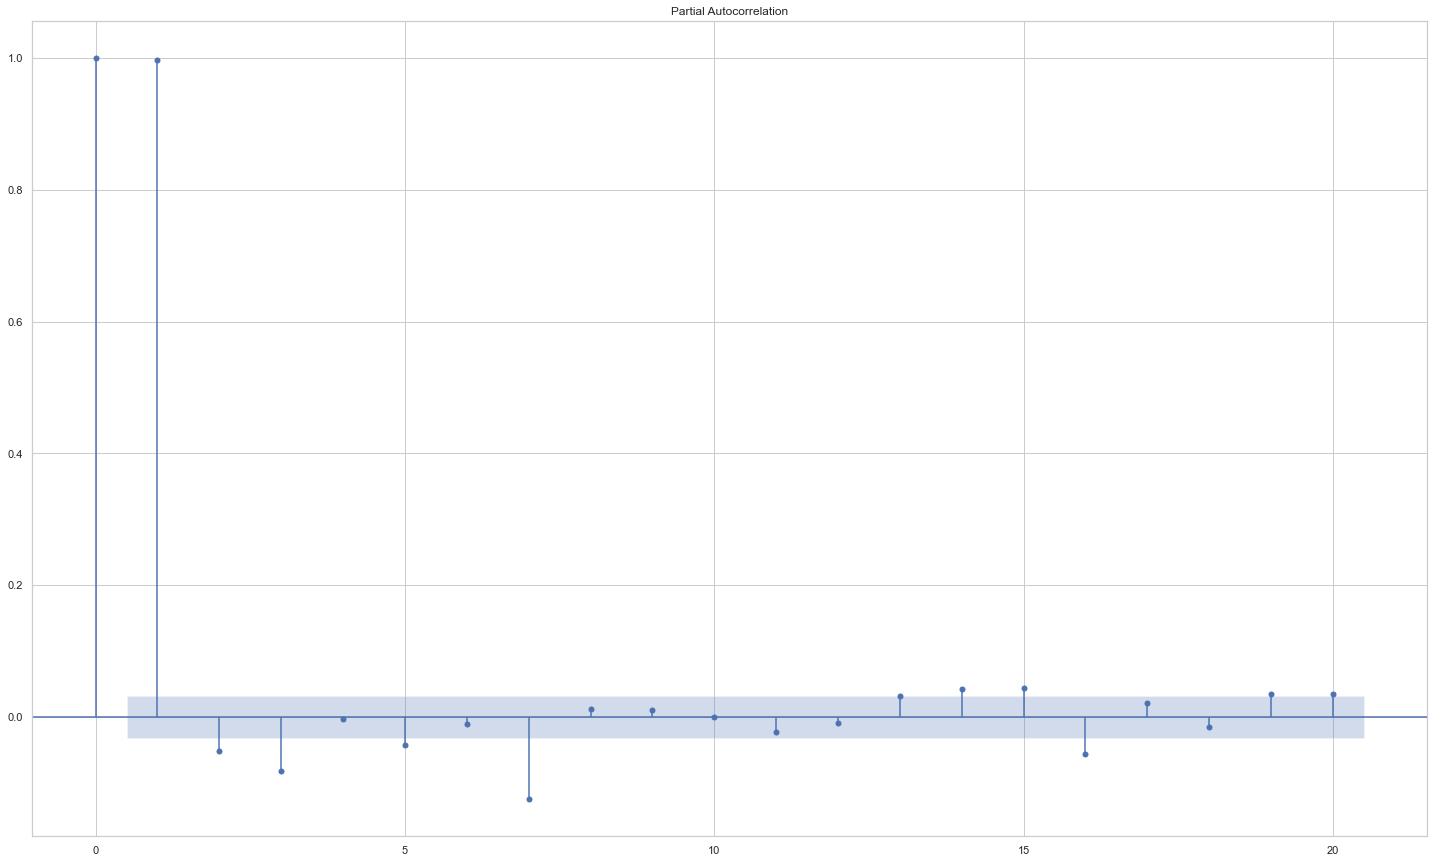

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(train_data_["priceUSD"],lags=20)
plt.show()

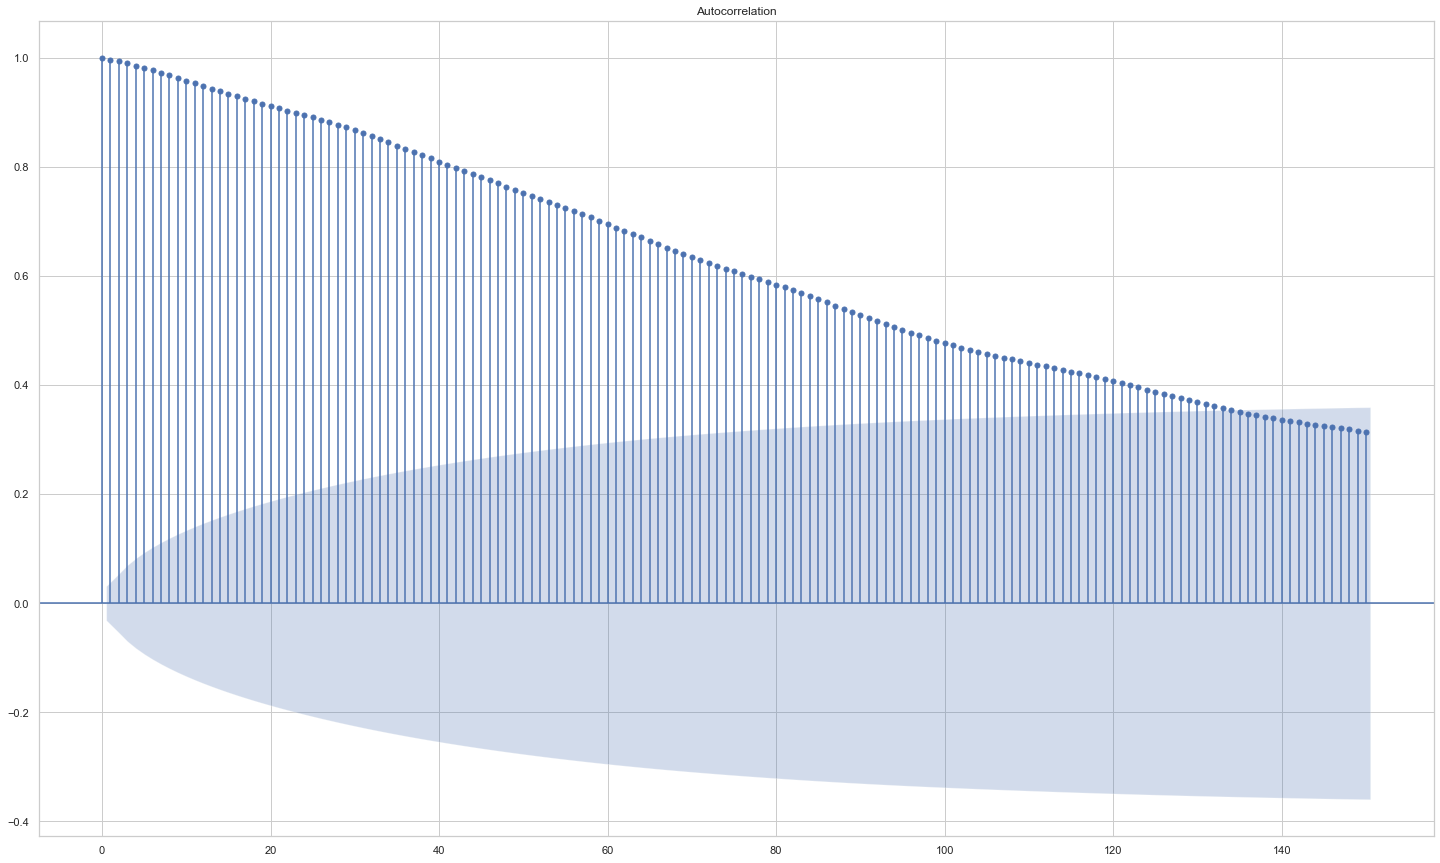

In [50]:
# Plotting autocorrelation of white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_data_["priceUSD"],lags=150,alpha=0.05)
plt.show()

The partial autocorrelation function shows a high correlation with the first lag and lesser correlation with the second and third lag. The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values.

As we can see, the time series contains significant auto-correlations up through lags 130

In [51]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(train_data_["priceUSD"], lags=[140], boxpierce=True)

c:\users\sushi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([257242.18848047]), array([0.]), array([254013.43163797]), array([0.]))

The value 256068.08656797 is the test statistic of the Box-Pierce test and 0.0 is its p-value as per the Chi-square(k=140) tables.
As we can see, both p-values are less than 0.01 and so we can say with 99% confidence that the time series is not pure white noise.

## Random Walk

In [52]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
#https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html
from statsmodels.tsa.stattools import adfuller
adf = adfuller(train_data_["priceUSD"])
print("p-value : {}".format(float(adf[1])))

p-value : 0.9722286648821412


## Generating a random walk

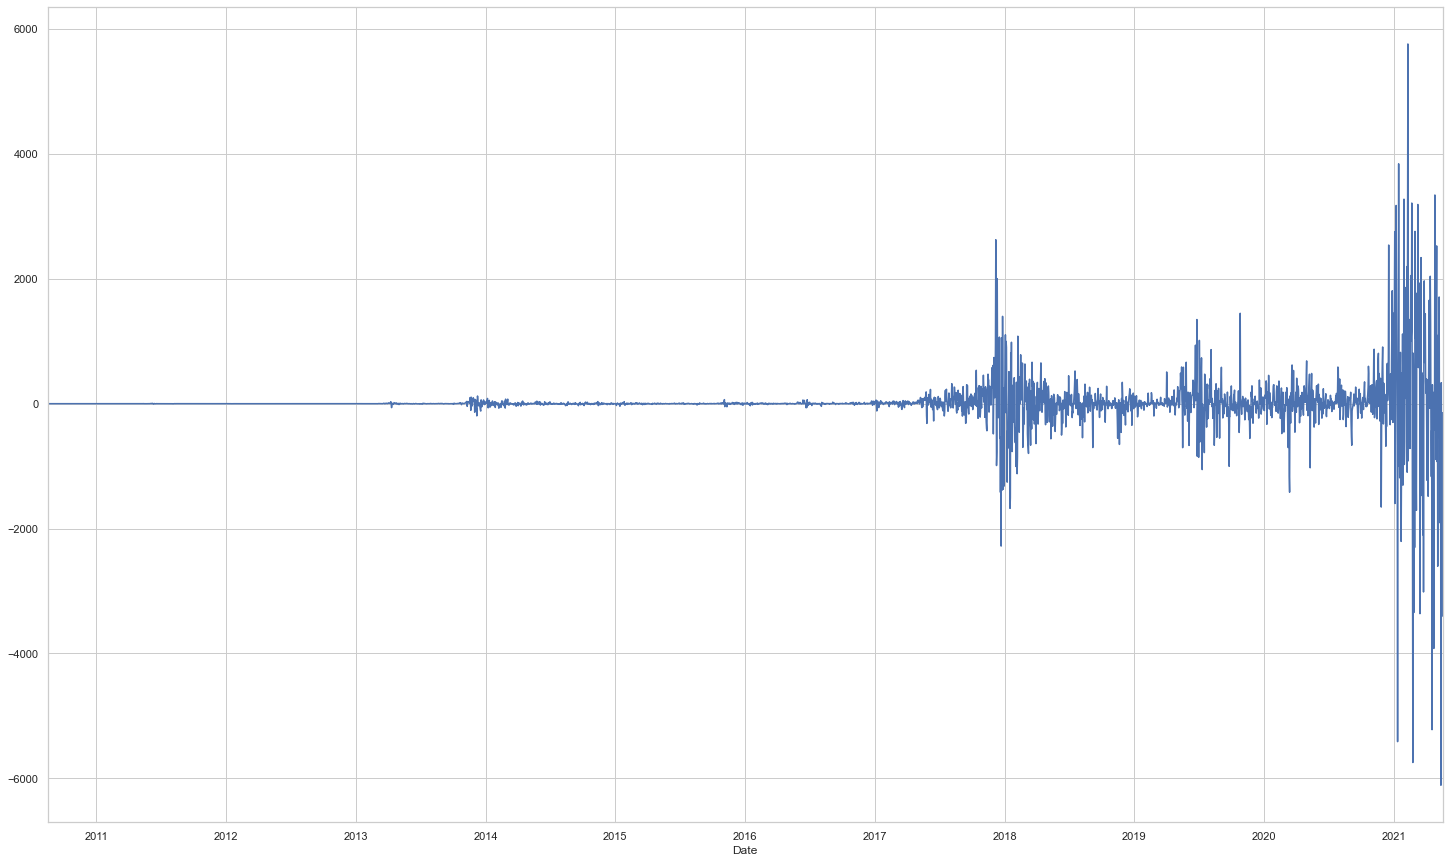

In [53]:
diff_Y_i = train_data_["priceUSD"].diff()
train_data_ = train_data_.assign(difference=pd.Series(diff_Y_i))

#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()
diff_Y_i.plot()
plt.show()

In [54]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(diff_Y_i, lags=[140], boxpierce=True)

c:\users\sushi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([1457.88354264]),
 array([5.75742842e-218]),
 array([1440.26378596]),
 array([1.66912709e-214]))

## Stationarity

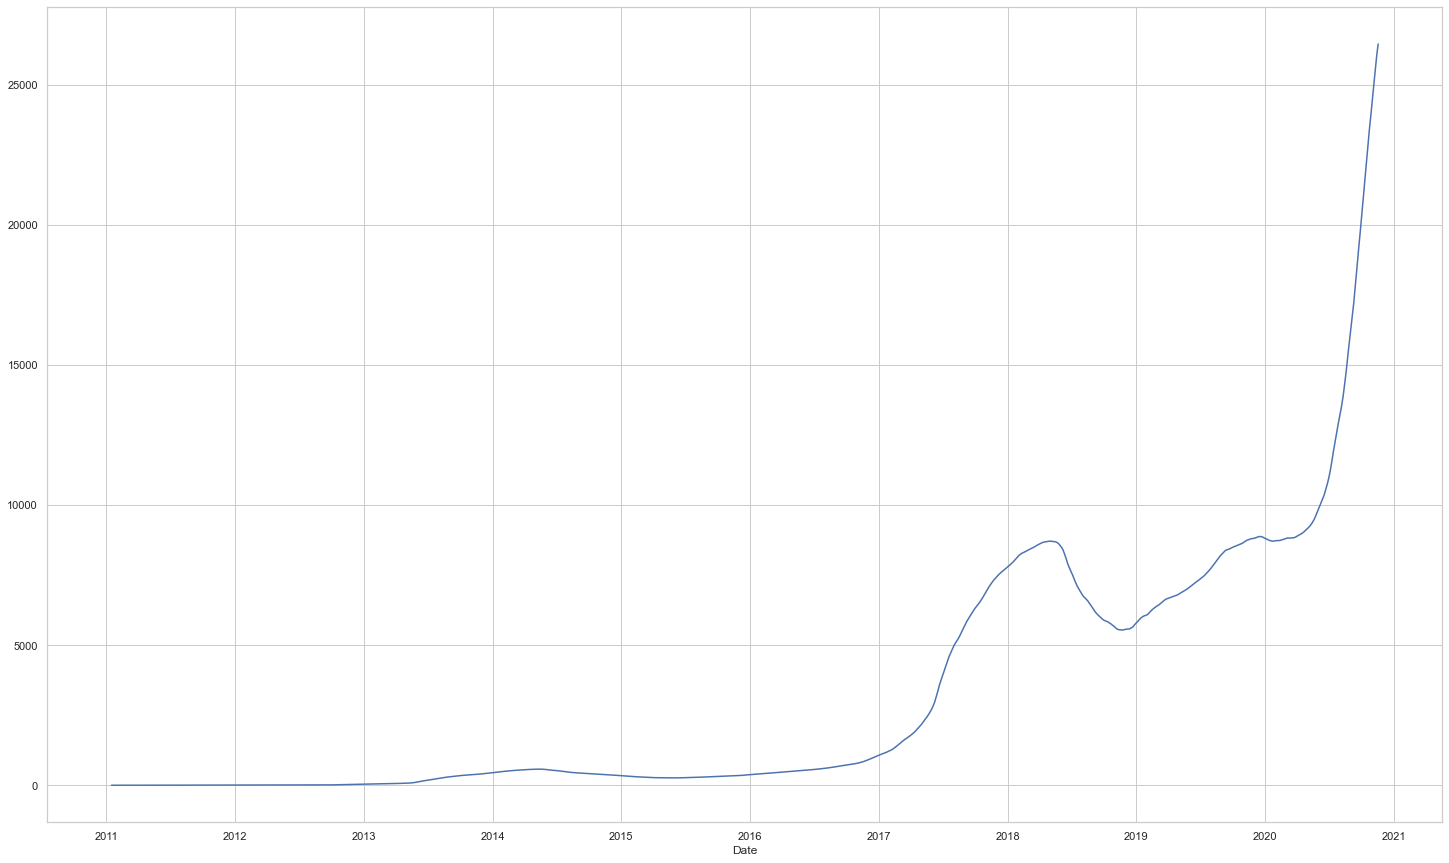

In [55]:
# non stationary
decomposed_train_data_.trend.plot()
plt.show()

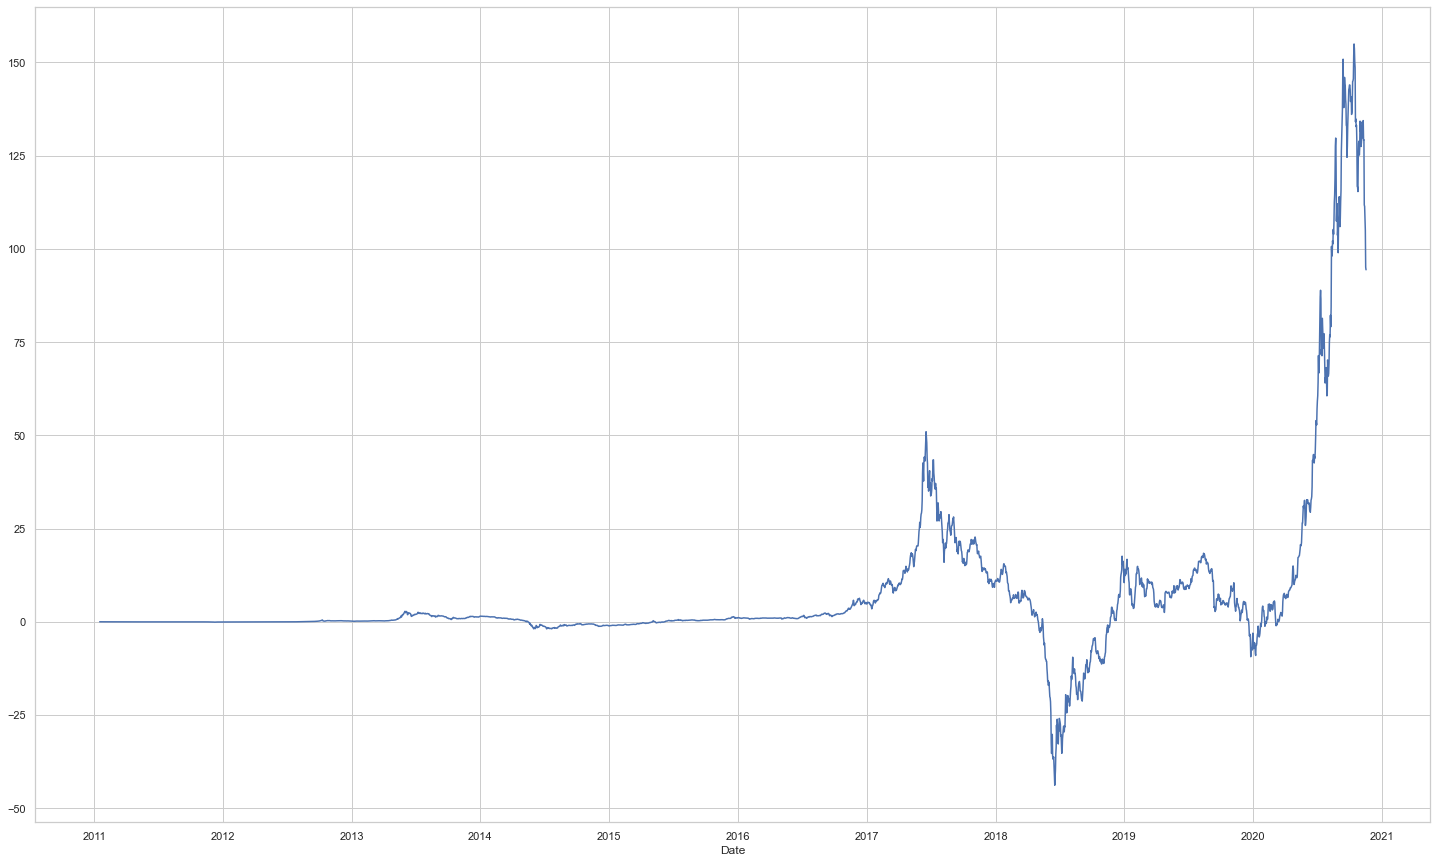

In [56]:
# The new stationary plot
decomposed_train_data_.trend.diff().plot()
plt.show()

In [57]:
train_data_

,priceUSD,sentinusd90momUSD,hashrate90mom,difficulty90mom,activeaddresses7std,difficulty7std,price14momUSD,sentinusdUSD,transactionvalue3stdUSD,activeaddresses3std,...,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Return,Mean,difference
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-16,0.0643,0.000000e+00,3.622219e+09,4.989240e+02,264.432,1.104210e+02,0.003,4.352000e+03,6.484,285.294,...,0.0661,0.0663,0.0655,0.0690,0.0635,0.0690,0.0660,-2.723147,0.064253,NaN
2010-08-17,0.0678,0.000000e+00,3.445072e+09,4.993650e+02,282.625,1.397380e+02,0.008,3.387000e+03,6.340,299.966,...,0.0643,0.0661,0.0663,0.0655,0.0690,0.0635,0.0690,5.443235,0.064093,0.0035
2010-08-18,0.0690,0.000000e+00,3.219241e+09,4.999270e+02,286.932,1.506710e+02,0.009,2.580000e+03,3.272,243.332,...,0.0678,0.0643,0.0661,0.0663,0.0655,0.0690,0.0635,1.769912,0.063530,0.0012
2010-08-19,0.0673,0.000000e+00,3.344209e+09,4.999270e+02,307.297,1.473670e+02,0.008,1.373000e+03,5.277,230.879,...,0.0690,0.0678,0.0643,0.0661,0.0663,0.0655,0.0690,-2.463768,0.063163,-0.0017
2010-08-20,0.0661,0.000000e+00,4.014649e+09,4.999270e+02,247.806,1.287370e+02,0.004,1.955000e+03,2.304,216.058,...,0.0673,0.0690,0.0678,0.0643,0.0661,0.0663,0.0655,-1.783061,0.062810,-0.0012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,50185.0000,4.119586e+10,1.960000e+19,3.612090e+12,156809.000,3.332650e+12,-5075.000,5.677290e+10,143815.000,170903.000,...,49849.0000,55961.0000,55852.0000,57763.0000,57981.0000,58527.0000,56818.0000,0.674036,55599.333333,336.0000
2021-05-15,48875.0000,2.933329e+10,-2.920000e+18,3.612090e+12,214115.000,3.954700e+12,-8912.000,4.490559e+10,38165.000,178679.000,...,50185.0000,49849.0000,55961.0000,55852.0000,57763.0000,57981.0000,58527.0000,-2.610342,55131.866667,-1310.0000
2021-05-16,47738.0000,1.328463e+10,4.030000e+18,3.612090e+12,245559.000,4.117970e+12,-9123.000,3.476459e+10,29877.000,63154.000,...,48875.0000,50185.0000,49849.0000,55961.0000,55852.0000,57763.0000,57981.0000,-2.326343,54665.433333,-1137.0000


# Modelling using statstools

# autoregressive (AR) mode

# Forecasting a simulated model

In [58]:
print(train_data_.isnull().values.sum())
train_data_.dropna(axis = 0, how ='any',inplace=True)
print(train_data_.isnull().values.sum())

1
0


In [59]:
# prepare situation
def moving_average_(data):
    X = data
    window = 3
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # zoom plot
    pyplot.plot(test[0:100],label="Original")
    pyplot.plot(predictions[0:100], color='red',label="Prediction")
    plt.legend()
    pyplot.show()

Test MSE: 294270.972


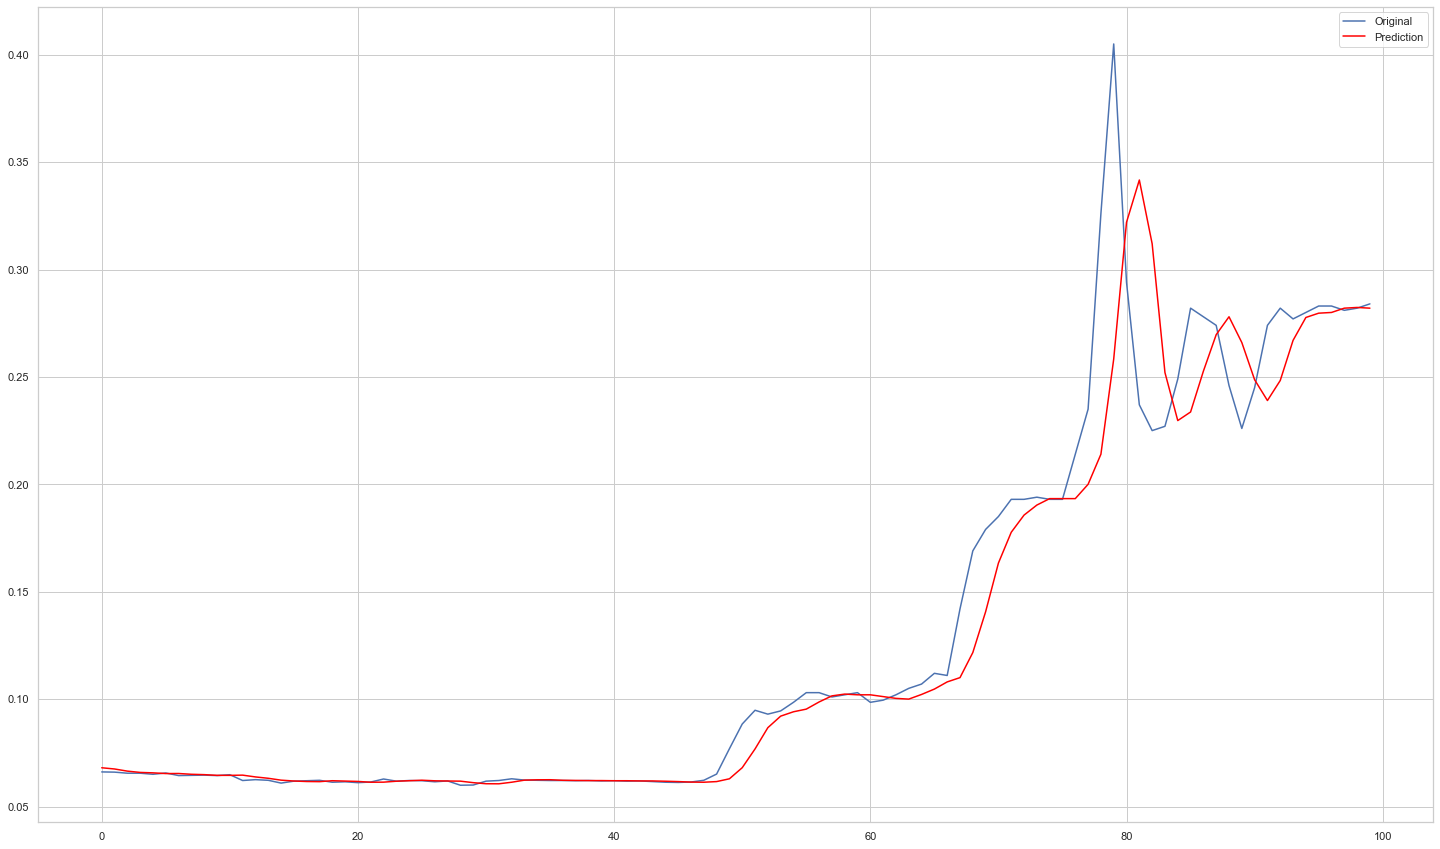

In [60]:
moving_average_(train_data_["priceUSD"].values)

In [61]:
df_train = train_data_[train_data_.index < "2019"]
df_valid = train_data_[train_data_.index >= "2019"]

In [62]:
def exponential_moving_():
    weights = np.arange(1,31) #this creates an array with integers 1 to 31 included
    weights
    wma10 = train_data_["priceUSD"].rolling(30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
    train_data_['30day_WMA'] = np.round(wma10, decimals=3)
    #sma10 = train_data_['priceUSD'].rolling(30).mean()
    temp = train_data_.dropna(how='any',axis=0) 
    print(sqrt(mean_squared_error(temp.priceUSD, temp['30day_WMA'])))
    plt.figure(figsize = (12,6))
    plt.plot(train_data_['priceUSD'], label="Price")
    plt.plot(wma10, label="30-Day WMA")
    #plt.plot(sma10, label="10-Day SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

1079.1989568347883


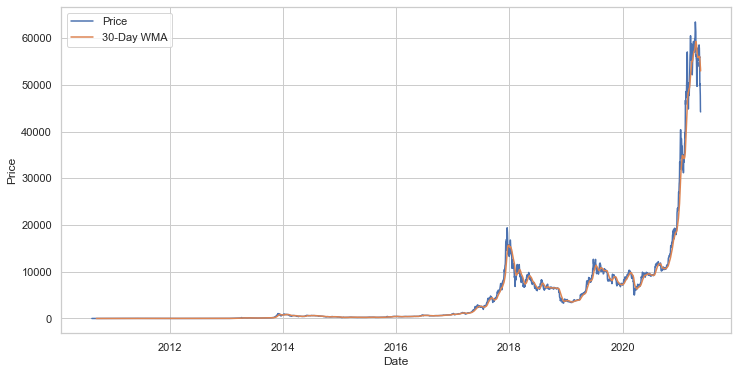

In [63]:
exponential_moving_()

# Exponential Moving Average

In [64]:
def exponential_moving_average():
    ema30 = train_data_['priceUSD'].ewm(span=30).mean()
    train_data_['30_day_EMA'] = np.round(ema30, decimals=3)
    print(sqrt(mean_squared_error(train_data_.priceUSD, train_data_['30_day_EMA'])))
    plt.figure(figsize = (12,6))
    plt.plot(train_data_['priceUSD'], label="Price")
    plt.plot(ema30, label="30-Day WMA")
    #plt.plot(sma10, label="10-Day SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

1248.6659358034833


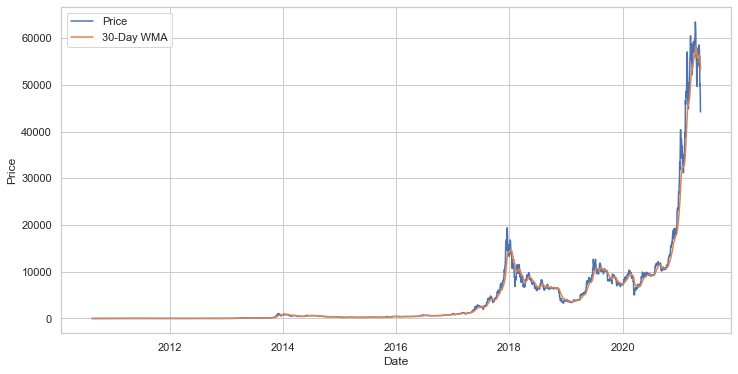

In [65]:
exponential_moving_average()

c:\users\sushi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


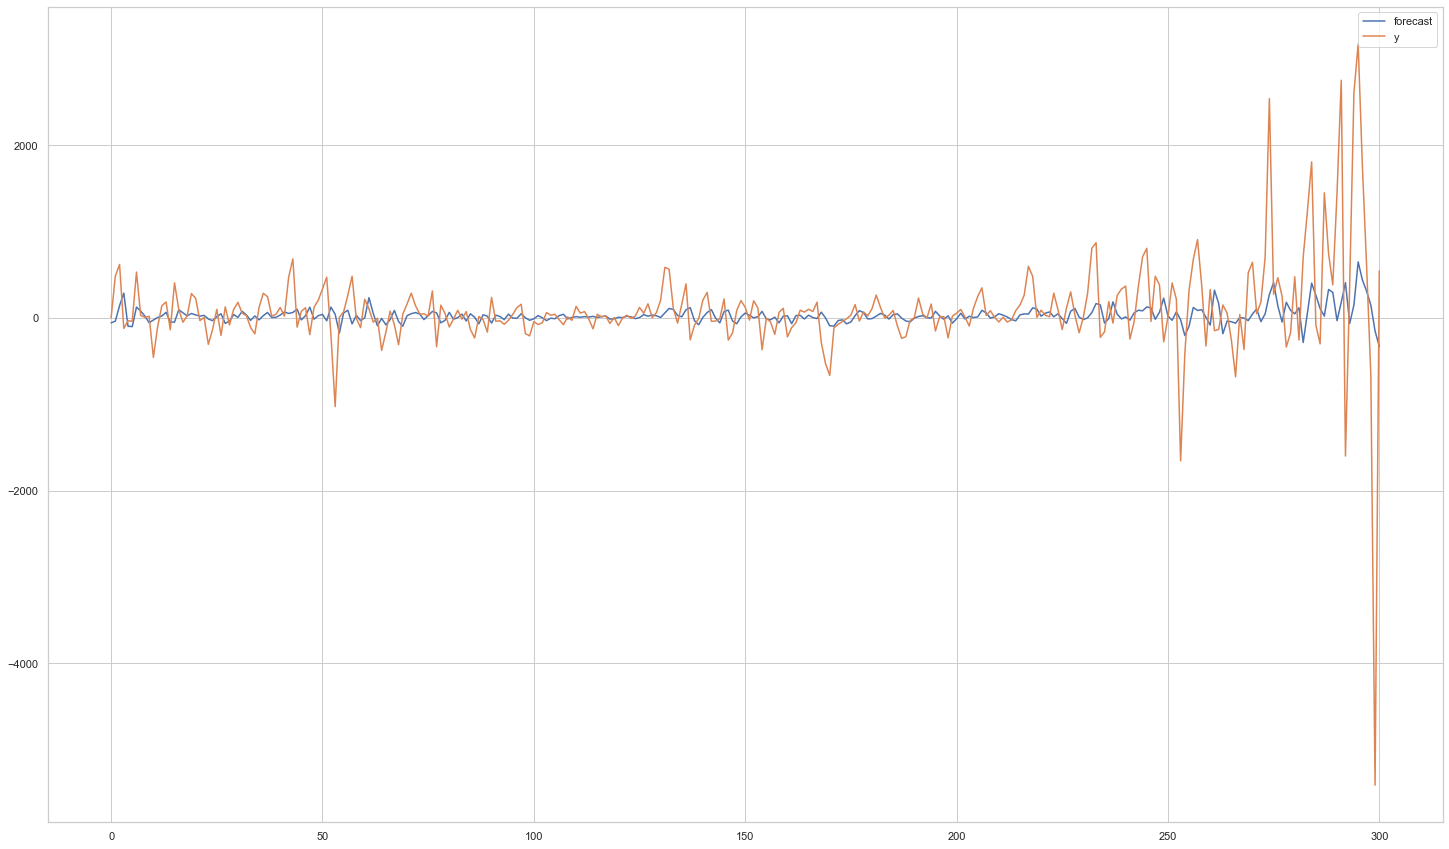

In [66]:

# Predicting closing prices 
humid = ARMA(train_data_["priceUSD"].diff().iloc[1:].values, order=(10,0))
res = humid.fit()
res.plot_predict(start=3500, end=3800)
plt.show();

In [67]:
"""
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = train_data_["priceUSD"].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# zoom plot
pyplot.plot(test[0:100],label="Original")
pyplot.plot(predictions[0:100], color='red',label="Prediction")
plt.legend()
pyplot.show()
"""

'\nfrom pandas import read_csv\nfrom numpy import mean\nfrom sklearn.metrics import mean_squared_error\nfrom matplotlib import pyplot\n# prepare situation\nX = train_data_["priceUSD"].values\nwindow = 3\nhistory = [X[i] for i in range(window)]\ntest = [X[i] for i in range(window, len(X))]\npredictions = list()\n# walk forward over time steps in test\nfor t in range(len(test)):\n\tlength = len(history)\n\tyhat = mean([history[i] for i in range(length-window,length)])\n\tobs = test[t]\n\tpredictions.append(yhat)\n\thistory.append(obs)\n\t#print(\'predicted=%f, expected=%f\' % (yhat, obs))\nerror = mean_squared_error(test, predictions)\nprint(\'Test MSE: %.3f\' % error)\n# zoom plot\npyplot.plot(test[0:100],label="Original")\npyplot.plot(predictions[0:100], color=\'red\',label="Prediction")\nplt.legend()\npyplot.show()\n'

# Prediction using ARIMA model

In [68]:
#train_data_.columns
train_data_.fillna(method='ffill', inplace=True)
train_data_.fillna(method='backfill', inplace=True)

In [69]:
train_data_.isnull().values.any()

False

In [70]:
#train_data_.columns

In [71]:
df_train = train_data_[train_data_.index < "2019"]
df_valid = train_data_[train_data_.index >= "2019"]

In [72]:
important_feature_=['sentinusd90momUSD','hashrate90mom','difficulty90mom',
                    'activeaddresses7std', 'difficulty7std','price14momUSD',
                    'sentinusdUSD', 'transactionvalue3stdUSD','activeaddresses3std',
                    'transactions3std', 'price30momUSD','fee_to_reward3stdUSD',
                    'mining_profitability90trx','sentinusd30momUSD',
                    'transactionvalue30momUSD', 'transactions','difficulty',
                    'difficulty14std', 'difficulty30mom', 'mining_profitability30trx',
                    'Change','expanding_mean','lag_1','lag_2','lag_3','lag_4','lag_5',
                    'lag_6','lag_7','Return','Mean','difference','30day_WMA','30_day_EMA']

In [73]:
from pmdarima import auto_arima
model = auto_arima(df_train.priceUSD, exogenous=df_train[important_feature_], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.priceUSD, exogenous=df_train[important_feature_])


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=46111.760, Time=14.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48392.646, Time=9.79 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46048.590, Time=9.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47011.329, Time=12.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=69894.307, Time=10.41 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=46037.988, Time=12.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=45989.711, Time=10.90 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=45950.377, Time=12.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=45926.615, Time=13.72 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=45935.074, Time=18.51 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=45970.287, Time=16.22 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=45925.439, Time=15.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=45949.344, Time=15.50 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=45933.885, Time=17.35 sec
 ARIMA(

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [74]:
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[important_feature_])
df_valid = df_valid.assign(Forecast_ARIMAX=forecast)
#df_valid["Forecast_ARIMAX"] = forecast

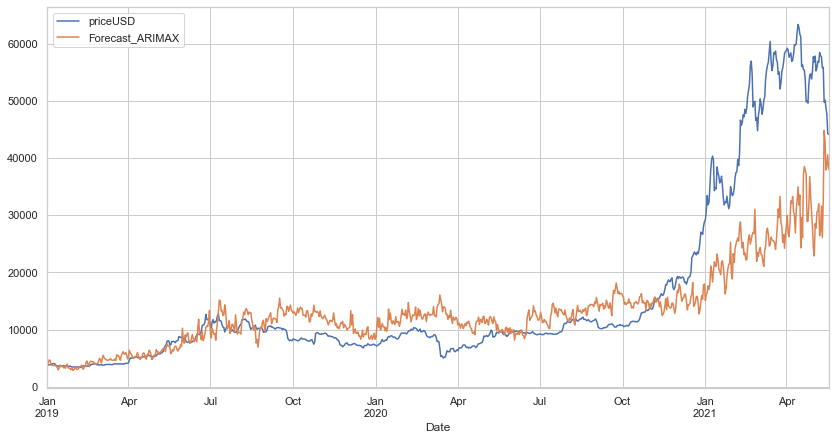

In [75]:
df_valid[["priceUSD", "Forecast_ARIMAX"]].plot(figsize=(14, 7))
plt.show()

In [76]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.priceUSD, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.priceUSD, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 9900.518008023915

MAE of Auto ARIMAX: 5641.641195693216


# Stacking classifier

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
train_data_= train_data_.sample(frac=1)
X_train=train_data_[:int(len(train_data_)*0.80)]
X_test=train_data_[int(len(train_data_)*0.80):]

In [79]:
X_train_d1=X_train[:len(X_train)//2]
X_train_d2=X_train[len(X_train)//2+1:]

In [80]:
from random import sample
# splitting dataframe in a particular size
def spliting(dataset):
    X_train_d1 = dataset.sample(frac=1)
    split= X_train_d1.sample(frac=0.5,random_state=0)
    return split

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
from sklearn.metrics import accuracy_score
from catboost import CatBoostRegressor
from catboost.utils import get_gpu_device_count
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Model1.Random Forest  Model2. XGboost  Model3.CatBoost  Model4.SVM  Model5. LR

In [82]:
%%time
def Model1(X1,y1):
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_grid = {'n_estimators': [5,10,20,50,100,200, 400, 600],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split': [2, 5, 10,20],
               'min_samples_leaf': [1, 2, 4,6,8,10],
               'bootstrap': [True, False]}

    rf = RandomForestRegressor()
    # Random search of parameters, using 5 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=1000, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X1, y1)
    Model1=RandomForestRegressor(n_estimators=rf_random.best_params_["n_estimators"],min_samples_split=rf_random.best_params_["min_samples_split"],
                                 min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
                                 max_features=rf_random.best_params_["max_features"],max_depth=rf_random.best_params_["max_depth"],
                                 bootstrap=rf_random.best_params_["bootstrap"])
    Model1.fit(X1,y1)
    
    return Model1
    

Wall time: 0 ns


In [83]:
#XGBoost hyper-parameter tuning
def Model2(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.001,0.01, 0.1],
        'max_depth': [5,10, 20, 40, 50,100, None],
        'min_child_weight': [1, 3, 5,10],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [50,100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    #gsearch = GridSearchCV(estimator = xgb_model,
                           #param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           #cv = 3,
                           #n_jobs = -1,
                           #verbose = 1)

#    gsearch.fit(X_train,y_train)
    Model2=XGBRegressor(colsample_bytree=0.3,learning_rate= 0.1,
                     max_depth=None,min_child_weight=3,
                     n_estimators=500,objective= 'reg:squarederror', 
                        subsample=0.7)
    Model2.fit(X_train, y_train)

    return Model2

Best parameter
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.3, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.7, tree_method=None,
             validate_parameters=None, verbosity=None)

In [84]:
%%time
#https://catboost.ai/docs/concepts/python-reference_catboostregressor_grid_search.html
def Model3(X_train,y):
    model = CatBoostRegressor()

    grid = {'learning_rate':  [0.01,0.05, 0.1],
            'depth': [4,8,12,10,16],
            'iterations'    : [100],
            'l2_leaf_reg': [1, 3, 5, 7, 9]}

    #grid_search_result = model.grid_search(grid,X=X_train, y=y,cv=3, partition_random_seed=0,verbose=True,plot=True)
    #Model3=CatBoostRegressor(depth=grid_search_result["params"]["depth"], l2_leaf_reg=grid_search_result["params"]["l2_leaf_reg"],
     #                        iterations=grid_search_result["params"]["iterations"], learning_rate=grid_search_result["params"]["learning_rate"])
    Model3=CatBoostRegressor(depth=4, l2_leaf_reg=1,iterations=100, learning_rate=0.1)
    Model3.fit(X_train,y)
    return Model3

Wall time: 0 ns


In [85]:
%%time
# Parameters for tuning
def Model4(X1,y):
    estimators=[]
    estimators.append(['standard', StandardScaler()])
    scaling=Pipeline(estimators)
    X_train4=scaling.fit_transform(X1)
    y=np.ravel(y)
    parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1000, 10000,15000,20000]}]
    print("Tuning hyper-parameters")
    svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5)
    svr.fit(X_train4, y)
    Model_4_svr=SVR(kernel=svr.best_params_["kernel"],gamma=svr.best_params_["gamma"],C=svr.best_params_["C"],verbose=False)
    Model_4_svr.fit(X_train4, y)
    return Model_4_svr

Wall time: 0 ns


In [86]:
def Model5(Xtrain,y):
    Model5=LinearRegression(normalize=True)
    estimators=[]
    estimators.append(['standard', StandardScaler()])
    scaling=Pipeline(estimators)
    X_train4=scaling.fit_transform(Xtrain)
    y=np.ravel(y)
    Model5.fit(X_train4,y)
    return Model5

In [87]:
#print(lin_reg.intercept_)
#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
#print(coeff_df)

In [88]:
"""
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
train_pred = lin_reg.predict(X_train5)
print_evaluate(y5, train_pred)

"""


"\nfrom sklearn import metrics\nfrom sklearn.model_selection import cross_val_score\ndef print_evaluate(true, predicted):  \n    mae = metrics.mean_absolute_error(true, predicted)\n    mse = metrics.mean_squared_error(true, predicted)\n    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))\n    r2_square = metrics.r2_score(true, predicted)\n    print('MAE:', mae)\n    print('MSE:', mse)\n    print('RMSE:', rmse)\n    print('R2 Square', r2_square)\n    print('__________________________________')\n    \ntrain_pred = lin_reg.predict(X_train5)\nprint_evaluate(y5, train_pred)\n\n"

In [89]:
#train_pred
#plt.figure(figsize = (12,6))
#plt.scatter(train_pred,y5, alpha=0.8)
#plt.ylabel('original')
#plt.xlabel('predicted')
#plt.show()

In [90]:
Models=[Model1,Model2,Model3,Model4,Model5]

In [91]:
%%time
Base_model=[]
k=int(input())
for i in range(k):
    i=i%5
    split=spliting(X_train_d1)
    X1=split.drop(columns=["priceUSD"])
    y1=split["priceUSD"]
    temp=Models[i](X1,y1)
    print(temp)
    Base_model.append(temp)
    

5
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=50)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
0:	learn: 8728.8831865	total: 188ms	remaining: 18.6s
1:	learn: 7952.6279774	total: 198ms	remaining: 9.7s
2:	learn: 7270.5875975	total: 221ms	remaining: 7.13s
3:	learn: 6616.3593682	total: 229ms	remaining: 5.49s
4:	learn: 6080.9183359	total: 235ms	remaining: 4.46s
5:	learn: 5572.2471459	total:

In [92]:
Base_model

[RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=50),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None),
 SVR(C=20000, gamma=0.001),
 LinearRegression(normalize=True)]

# Predicting on D2 data Set

In [93]:
X_train_d2_pre=X_train_d2.drop(columns=["priceUSD"])
X_train_d2_pre_y=X_train_d2["priceUSD"]

In [94]:
# create an Empty DataFrame object
meta_df_ = pd.DataFrame()

In [95]:
count=1
predication=[]
for i in Base_model:
    Model="Model"+str(count)
    result=list(i.predict(X_train_d2_pre))
    #meta_df_ = meta_df_.assign(count=pd.Series(result))
    predication.append(result)
    

In [96]:
columns=[Model+str(i) for i in range(1,k+1)]
final = pd.DataFrame(np.array(predication).T,columns=columns)

In [97]:
final

,Model11,Model12,Model13,Model14,Model15
0,275.283409,237.432205,185.502374,14213.233699,1.899088e+06
1,566.851291,642.697510,565.309744,14213.233699,5.601729e+06
2,275.283409,283.165649,282.094102,14213.233699,2.331025e+06
3,9290.936234,9793.561523,10182.368468,14213.233699,3.693713e+07
4,6364.584440,6792.531250,7375.320848,14213.233699,3.719445e+07
...,...,...,...,...,...
1565,16729.348191,16593.470703,17096.224618,14213.233699,1.420998e+08
1566,26.555378,12.970414,52.849166,14213.233699,1.247155e+05
1567,26.555378,125.085289,165.377332,14213.233699,1.100077e+06
1568,6178.817098,5790.761719,5073.967724,14213.233699,6.070386e+07


In [98]:
Model_final=RandomForestRegressor(n_estimators= 50,min_samples_split=5,min_samples_leaf=1,
                             max_features='auto',max_depth=20,bootstrap=True)

In [99]:
Model_final.fit(final,X_train_d2_pre_y)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=50)

# Final

In [100]:
X_test_=X_test.drop(columns=["priceUSD"])
X_test_y=X_test["priceUSD"]

In [101]:
X_test_

,sentinusd90momUSD,hashrate90mom,difficulty90mom,activeaddresses7std,difficulty7std,price14momUSD,sentinusdUSD,transactionvalue3stdUSD,activeaddresses3std,transactions3std,...,lag_3,lag_4,lag_5,lag_6,lag_7,Return,Mean,difference,30day_WMA,30_day_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-16,-488150674.0,2.490000e+19,9.279648e+10,101756.000,1.769370e+11,2763.000,8.226066e+09,79376.000,138362.000,48647.000,...,16289.000,15919.000,15585.000,15323.000,15382.000,2.275000,14075.100000,364.000,14852.249,14315.385
2011-10-26,-45271746.0,-5.223650e+12,-2.227000e+05,1728.000,0.000000e+00,-1.276,1.168805e+06,40.306,1233.000,643.797,...,3.123,2.874,2.460,2.299,2.345,4.382320,3.893733,0.116,3.406,3.844
2011-04-08,77560.0,4.891780e+11,6.603800e+04,884.889,1.300700e+04,-0.123,9.619600e+04,17.130,362.544,153.278,...,0.700,0.729,0.780,0.778,0.775,0.133156,0.813133,0.001,0.788,0.800
2015-09-05,27353522.0,4.130000e+16,9.368057e+09,38018.000,2.052858e+09,2.086,1.867659e+08,608.650,54799.000,21512.000,...,228.016,228.197,228.792,229.659,230.117,1.255577,242.618567,2.876,233.621,240.827
2015-03-19,5675455.0,9.750000e+16,7.969884e+09,24162.000,0.000000e+00,-13.373,2.518458e+08,1549.000,28551.000,6332.000,...,290.818,283.896,283.365,291.010,294.297,-6.027769,264.957233,-16.493,274.581,268.577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-19,-895533580.0,3.540000e+17,7.204816e+10,43687.000,5.250194e+09,3.542,8.126835e+08,8989.000,58358.000,28054.000,...,415.443,415.778,414.027,412.764,413.346,-1.342607,420.478067,-5.546,416.760,414.032
2013-10-25,426569542.0,2.827060e+15,2.364743e+08,24691.000,8.000000e+00,45.638,4.649248e+08,4661.000,9011.000,7060.000,...,180.316,164.810,157.329,153.886,143.723,-8.693731,135.484167,-16.136,145.737,143.054
2012-07-24,9405958.0,3.732000e+12,2.884780e+05,4829.000,0.000000e+00,1.412,1.437387e+07,114.546,3192.000,5405.000,...,8.702,8.695,8.990,8.955,8.650,0.995379,7.384400,0.084,7.844,7.586


In [102]:
count=1
predication_f=[]
for i in Base_model:
    Model="Model"+str(count)
    result=list(i.predict(X_test_))
    #meta_df_ = meta_df_.assign(count=pd.Series(result))
    predication_f.append(result)

In [103]:
columns=[Model+str(i) for i in range(1,k+1)]
final_f = pd.DataFrame(np.array(predication_f).T,columns=columns)

In [104]:
Y_pred = Model_final.predict(final_f)

In [105]:
from sklearn import metrics
mae = round(metrics.mean_absolute_error(X_test_y, Y_pred), 4)
mse= round(metrics.mean_squared_error(X_test_y, Y_pred), 4)

In [106]:
print(mae,"\n",mse)

119.9236 
 168713.0298
